* * * * * * * * * * *
Master notebook to run every step of the analyses of the Z0 experiment in python.

Authors: Rodrigo Guedes Lang (rodrigo.lang@fau.de), Pedro Batista (pedro.batista@fau.de)

Date: Sep 2024

Based on scripts by Kathrin Valerius and Jannik Hofestaedt from 2011-2013

Editet by: Fabian Sochor & Franz Pacher
* * * * * * * * * * *

# Important note:

- At the end of each section, remember to commit your changes (preferrably, but you can commit as many times you want), after you checked out to your group's branch.
- At the end of each day, remember to push your changes to your remote branch with `git push`. **DO NOT PUSH TO THE MAIN  BRANCH** (you should not be able to, but do not try it either way). If you're unsure about which branch you're in currently, run `git status` or `git branch` to check it.

#### Git cheat sheet: https://education.github.com/git-cheat-sheet-education.pdf

In [191]:
from glob import glob
from natsort import natsorted
import uproot
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Additional parameters to make plots below look better
plt.rcParams['axes.grid'] = True
#plt.rcParams['lines.color'] = 'blue'



In [192]:
from PIL import Image
from IPython.display import display

import ipywidgets as widgets
from ipywidgets import interact

import random

In [193]:
def browse_images(channel):
    images = natsorted(glob(f'../Data/GROPEScreenshots/{channel}/*.png'))
    def view_image(i):
        display(Image.open(images[i]))
    interact(view_image, i=(0,len(images)-1))

def pick_images():
    n = random.sample(range(0,40), k=10)
    images = natsorted(glob(f'../Data/GROPEScreenshots/test/*.png'))
    def view_image(i):
        display(Image.open(images[i]))
    interact(view_image, i=n)
    print(n)

In [194]:
# replace with own local path to read in data
local_path=r"/Users/FranzValentinPacher/Desktop/Akademisches/UNI/Semester/11. Semester/FP_WS24:25/Z0_Boson/Data"
# r infront of string very important, otherwise cant read the path correclty...

In [195]:
#test="/".join((local_path,"ee.root"))
#print(test)

# Part 1 - Qualitative analysis of events

In this part of the experiment, the main idea is to look at a small subset of Monte Carlo (MC) events to build up insight on how events from each channel look like on average. The final good is to come up with some crude cuts to separate the channels.

## Part 1.1 - GROPE event display

### Exercises

- 1.1. For each channel, describe qualitatively the features of its events.

- 1.2. Come up with a 4x4 table describing which variables are important for separating each pair of channels

In [196]:
browse_images("tt")

ValueError: value must be between min and max (min=0, value=-1, max=-1)

- 1.3. Now, for 10 randomly selected images, just by looking at the GROPE image, try to evaluate what channel each event originates from (ee, mm, tt or qq).

In [6]:
pick_images()

interactive(children=(Dropdown(description='i', options=(6, 2, 33, 10, 24, 20, 19, 0, 5, 38), value=6), Output…

[6, 2, 33, 10, 24, 20, 19, 0, 5, 38]


# Part 2 - Quantitative analysis of events

Looking at singular events may help understanding how they look like in the detector. Nevertheless, due to the stochastic nature of the processes involved, each event will look quite differently and we need to look at event distributions.

In the previous part, we have dealt with very few MC events to create a better insight on what their properties and differences are. In this part, we will move on to a much larger set of MC events so that more complete and well-described distributions can be analysed. From here on, information and images of single events will not be used anymore.

## Part 2.1 - Generating histograms

In [197]:
# Example for a single channel

file = uproot.open("/".join((local_path,"ee.root")))  # like this and it read local data without any issues

#file = uproot.open("../Data/MC/ee.root")
tree = file['h3'] #tree determines which data from which channel is being used for the histograms below

Ncharged = np.array(tree['Ncharged'].array())
Pcharged = np.array(tree['Pcharged'].array())
E_ecal = np.array(tree['E_ecal'].array())
E_hcal = np.array(tree['E_hcal'].array())
cos_thru = np.array(tree['cos_thru'].array())
cos_thet = np.array(tree['cos_thet'].array())

Ncharged_ee = Ncharged
Pcharged_ee = Pcharged
E_ecal_ee = E_ecal
E_hcal_ee = E_hcal
cos_thru_ee = cos_thru
cos_thet_ee = cos_thet

Each one of the python variable above is `numpy.ndarray`, containing available MC data such as number of charged tracks (e.g. `Ncharged`), or energy deposited in the electromagnetic calorimeter (e.g. `E_ecal`)

In [198]:
print(Ncharged, type(Ncharged))

[2. 2. 0. ... 2. 2. 2.] <class 'numpy.ndarray'>


In [199]:
#setting colours for the different decay channels
# in keeping with the colours of the GROPE programm, as much as possible
ee_colour='green'
tt_colour='blue'
mm_colour='red'
qq_colour='purple'

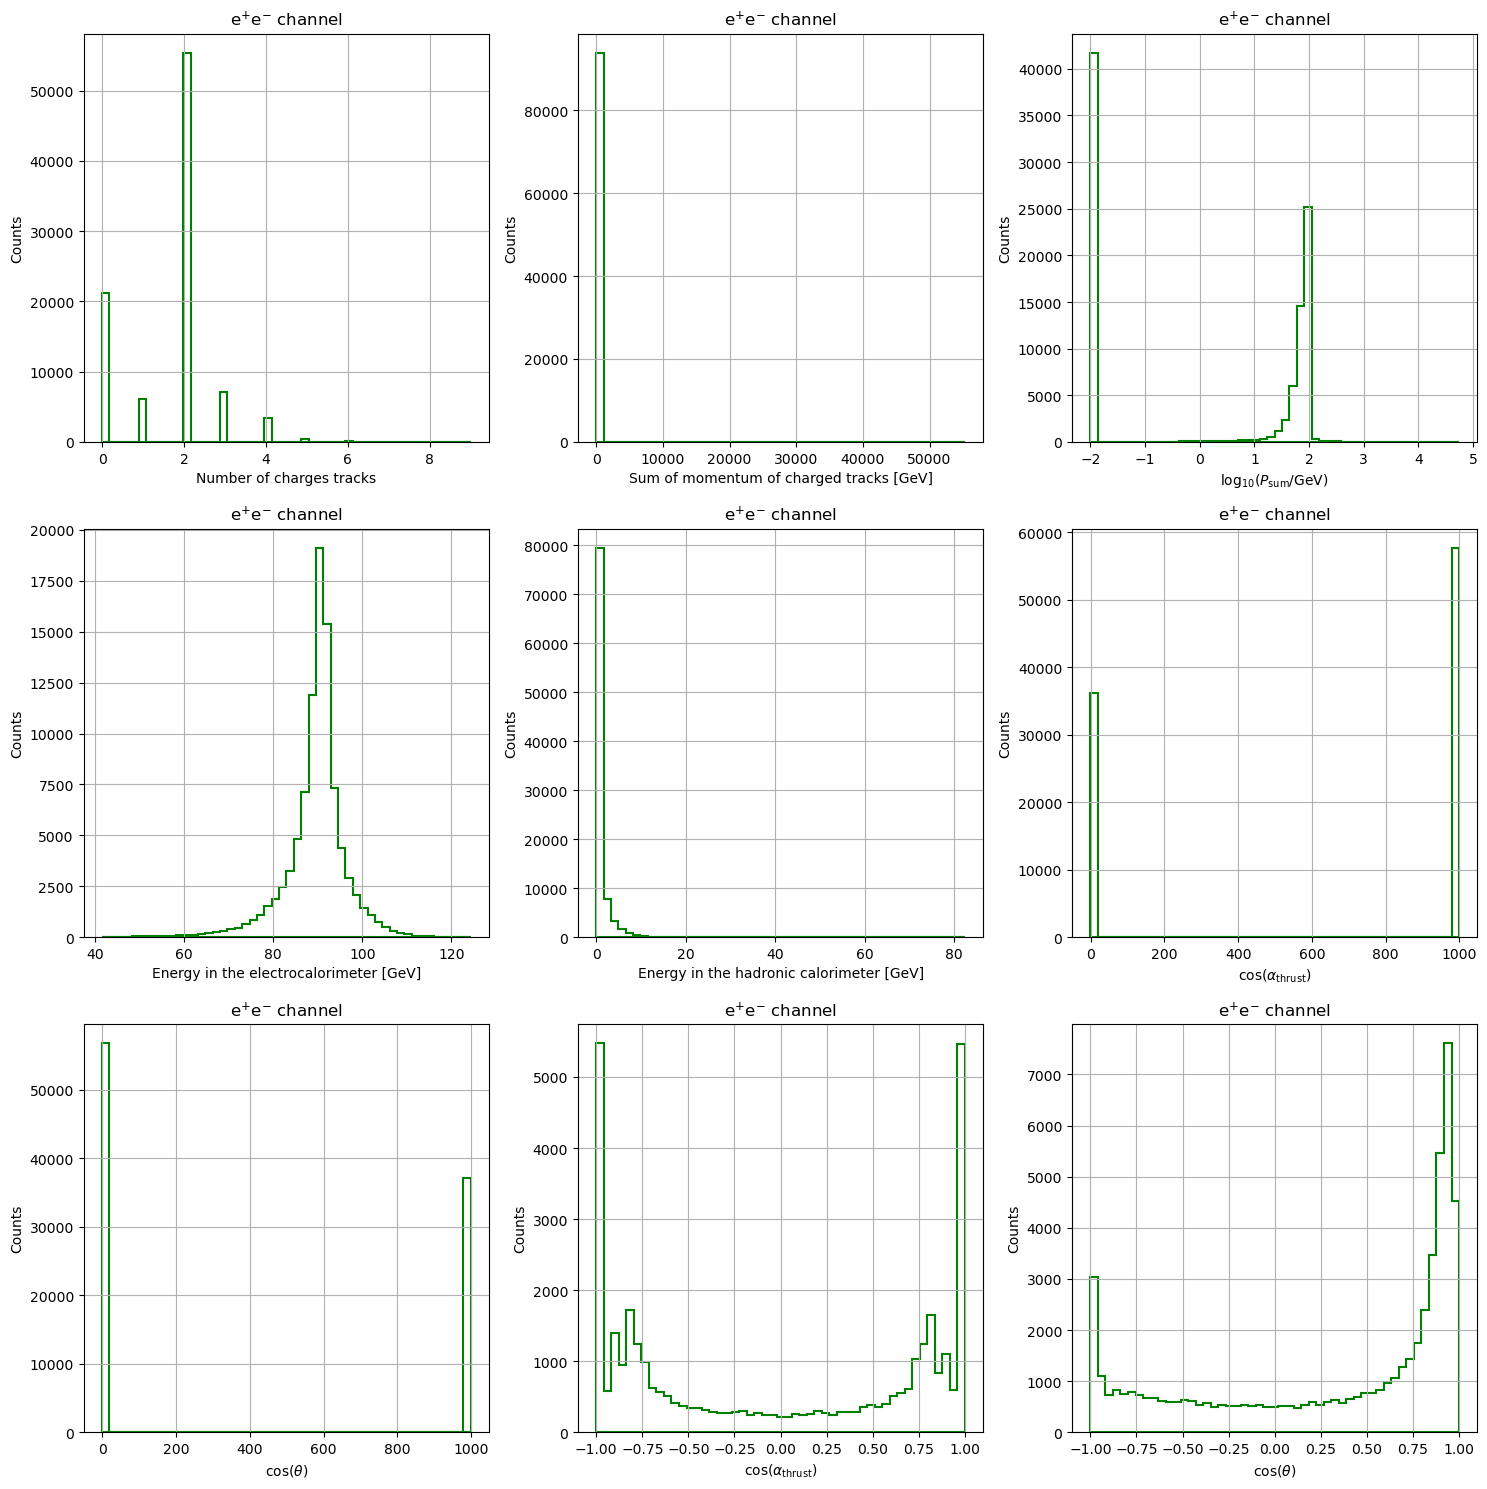

In [200]:
# ee
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15)) ## Create a grid of figures
## Each axis in ax is accessed via matrix notation, e.g., ax[i,j]

ax[0,0].hist(Ncharged, bins=50,histtype='stepfilled',facecolor='none',edgecolor=ee_colour,linewidth=1.5)
ax[0,0].set_xlabel("Number of charges tracks")
ax[0,0].set_ylabel("Counts")
ax[0,0].set_title(r"$\rm{e^{+}e^{-}}$ channel")

## If you want to generate just one figure for a quick check, you don't need to create fig and ax instances with plt.subplots()
## Instead, you might want to just use plt.plot() or plt.hist() like this:
"""
plt.hist(Ncharged,bins=50)
plt.xlabel("Number of charges tracks")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
"""
##

ax[0,1].hist(Pcharged, bins=50,histtype='stepfilled',facecolor='none',edgecolor=ee_colour,linewidth=1.5)
ax[0,1].set_xlabel("Sum of momentum of charged tracks [GeV]")
ax[0,1].set_ylabel("Counts")
ax[0,1].set_title(r"$\rm{e^{+}e^{-}}$ channel")

ax[0,2].hist(np.log10(Pcharged+0.01), bins=50,histtype='stepfilled',facecolor='none',edgecolor=ee_colour,linewidth=1.5)
ax[0,2].set_xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
ax[0,2].set_ylabel("Counts")
ax[0,2].set_title(r"$\rm{e^{+}e^{-}}$ channel")

ax[1,0].hist(E_ecal, bins=50,histtype='stepfilled',facecolor='none',edgecolor=ee_colour,linewidth=1.5)
ax[1,0].set_xlabel("Energy in the electrocalorimeter [GeV]")
ax[1,0].set_ylabel("Counts")
ax[1,0].set_title(r"$\rm{e^{+}e^{-}}$ channel")

ax[1,1].hist(E_hcal, bins=50,histtype='stepfilled',facecolor='none',edgecolor=ee_colour,linewidth=1.5)
ax[1,1].set_xlabel("Energy in the hadronic calorimeter [GeV]")
ax[1,1].set_ylabel("Counts")
ax[1,1].set_title(r"$\rm{e^{+}e^{-}}$ channel")

ax[1,2].hist(cos_thru, bins=50,histtype='stepfilled',facecolor='none',edgecolor=ee_colour,linewidth=1.5)
ax[1,2].set_xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
ax[1,2].set_ylabel("Counts")
ax[1,2].set_title(r"$\rm{e^{+}e^{-}}$ channel")

ax[2,0].hist(cos_thet, bins=50,histtype='stepfilled',facecolor='none',edgecolor=ee_colour,linewidth=1.5)
ax[2,0].set_xlabel(r"$\cos(\theta)$")
ax[2,0].set_ylabel("Counts")
ax[2,0].set_title(r"$\rm{e^{+}e^{-}}$ channel")

ax[2,1].hist(cos_thru, bins=np.linspace(-1,1,50),histtype='stepfilled',facecolor='none',edgecolor=ee_colour,linewidth=1.5)
ax[2,1].set_xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
ax[2,1].set_ylabel("Counts")
ax[2,1].set_title(r"$\rm{e^{+}e^{-}}$ channel")

ax[2,2].hist(cos_thet, bins=np.linspace(-1,1,50),histtype='stepfilled',facecolor='none',edgecolor=ee_colour,linewidth=1.5)
ax[2,2].set_xlabel(r"$\cos(\theta)$")
ax[2,2].set_ylabel("Counts")
ax[2,2].set_title(r"$\rm{e^{+}e^{-}}$ channel")

fig.tight_layout() ## So labels are not clipped
# fig.savefig("../Figures/example.pdf") or plt.savefig(<str /path/to/filename>) to save the figures

### Questions

Three plots were "redefined".

1. For $P_{\rm{sum}}$, we used log10 (and had to add 0.01). Why?
2. For the angles, we need to constrain to the physical values, i.e., $-1 < \cos(\theta) < 1$. What happened to the events with unphysical angles?

3. Answer 1) You have to add a small offset in the logarithm to avoid computer being not happy if it has to try and calculate log(0)
4. Answer 2) Unphysical angles come from unphysical events, therefore constraining the measurements to the actual angles that we want, the additional events that dont make any sense are simply ignored. Unphysical events are present here since everything in this step of the evalutaion is part of numerical simulations, which allow for unphysical numbers/events to be returned as results.

   

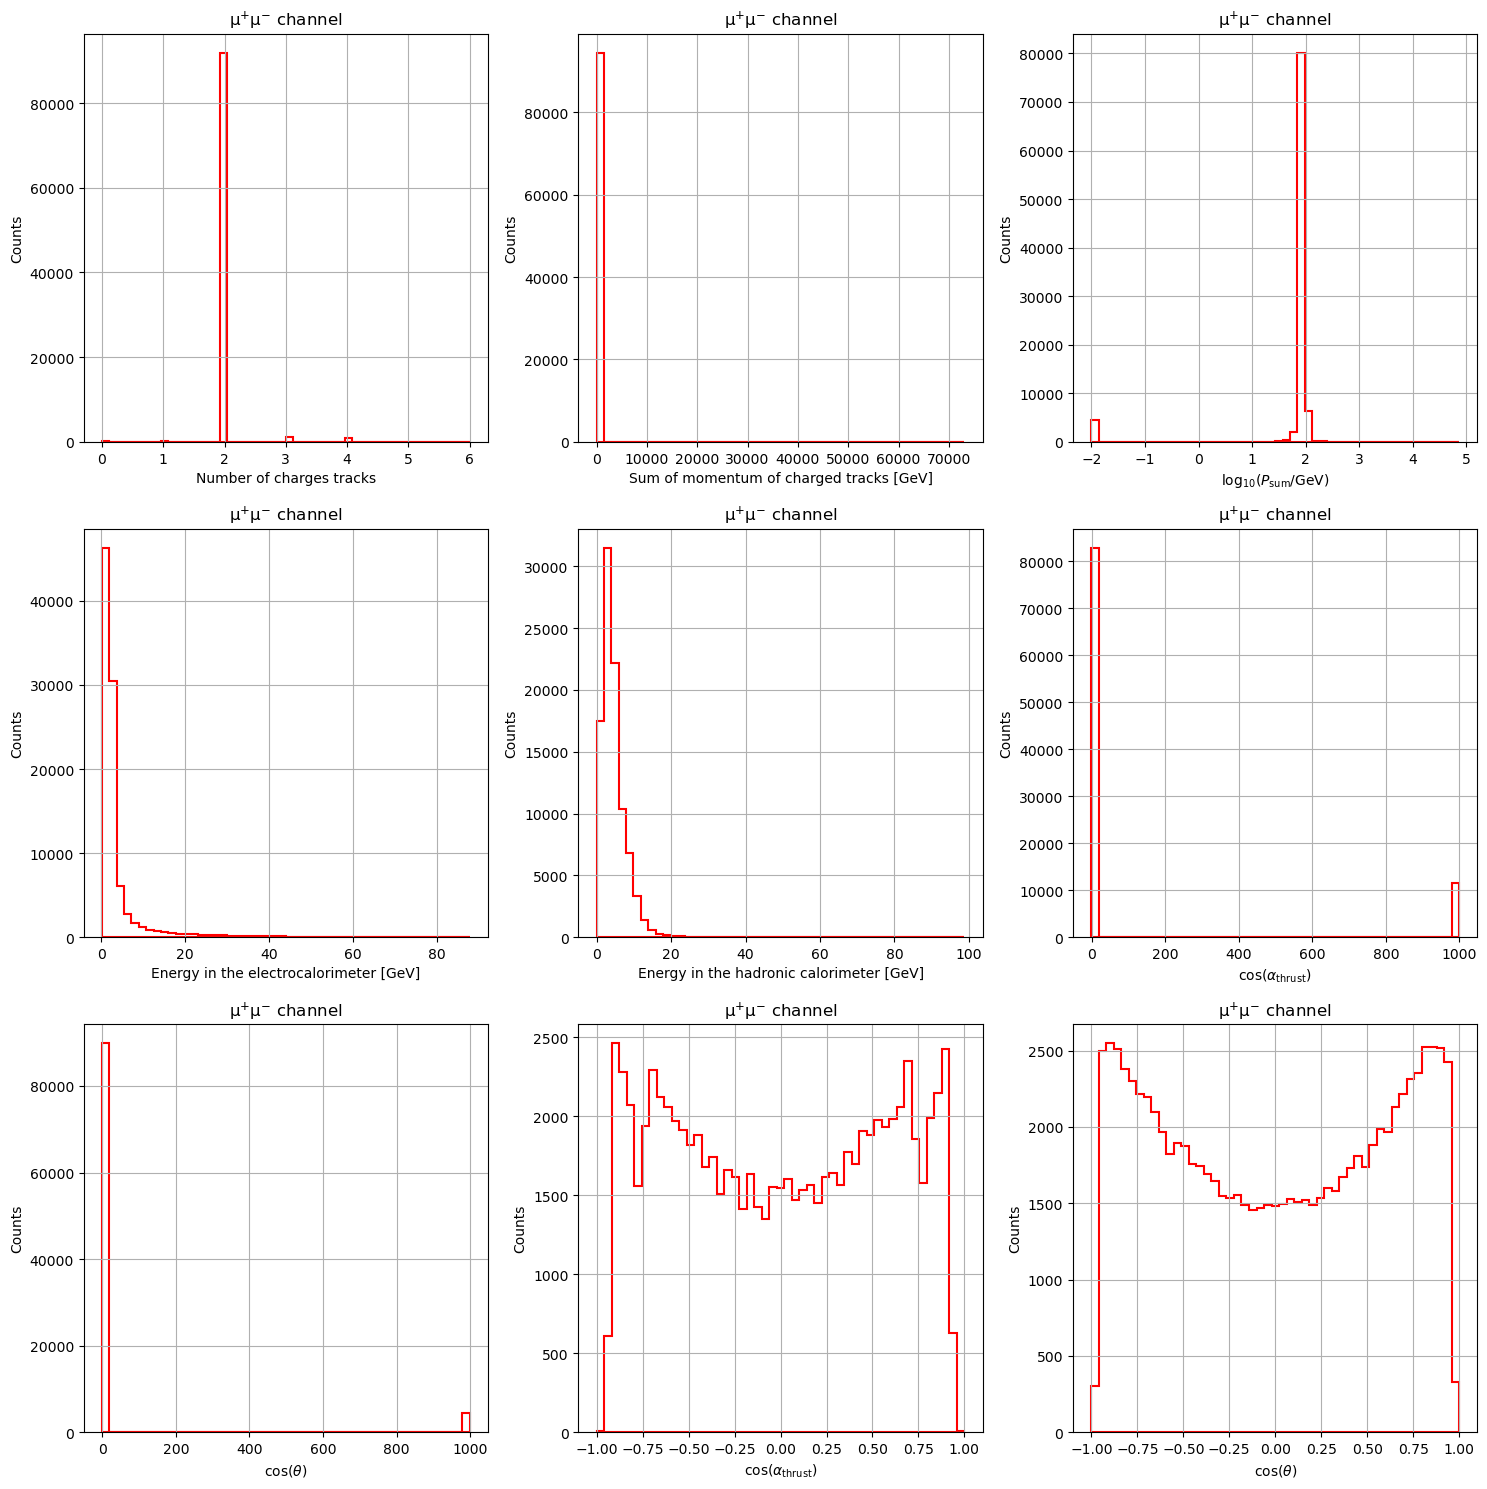

In [201]:

# Example for a single channel . mm 


file= uproot.open("/".join((local_path,"mm.root")))
# file = uproot.open("../Data/MC/mm.root")
tree = file['h3'] #tree determines which data from which channel is being used for the histograms below

Ncharged = np.array(tree['Ncharged'].array())
Pcharged = np.array(tree['Pcharged'].array())
E_ecal = np.array(tree['E_ecal'].array())
E_hcal = np.array(tree['E_hcal'].array())
cos_thru = np.array(tree['cos_thru'].array())
cos_thet = np.array(tree['cos_thet'].array())

Ncharged_mm = Ncharged
Pcharged_mm = Pcharged
E_ecal_mm = E_ecal
E_hcal_mm = E_hcal
cos_thru_mm = cos_thru
cos_thet_mm = cos_thet

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15)) ## Create a grid of figures
## Each axis in ax is accessed via matrix notation, e.g., ax[i,j]

#



ax[0,0].hist(Ncharged, bins=50,histtype='stepfilled',facecolor='none',edgecolor=mm_colour,linewidth=1.5)
ax[0,0].set_xlabel("Number of charges tracks")
ax[0,0].set_ylabel("Counts")
ax[0,0].set_title(r"$\rm{\mu^{+}\mu^{-}}$ channel")

## If you want to generate just one figure for a quick check, you don't need to create fig and ax instances with plt.subplots()
## Instead, you might want to just use plt.plot() or plt.hist() like this:
"""
plt.hist(Ncharged,bins=50)
plt.xlabel("Number of charges tracks")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
"""
##

ax[0,1].hist(Pcharged, bins=50,histtype='stepfilled',facecolor='none',edgecolor=mm_colour,linewidth=1.5)
ax[0,1].set_xlabel("Sum of momentum of charged tracks [GeV]")
ax[0,1].set_ylabel("Counts")
ax[0,1].set_title(r"$\rm{\mu^{+}\mu^{-}}$ channel")

ax[0,2].hist(np.log10(Pcharged+0.01), bins=50,histtype='stepfilled',facecolor='none',edgecolor=mm_colour,linewidth=1.5)
ax[0,2].set_xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
ax[0,2].set_ylabel("Counts")
ax[0,2].set_title(r"$\rm{\mu^{+}\mu^{-}}$ channel")

ax[1,0].hist(E_ecal, bins=50,histtype='stepfilled',facecolor='none',edgecolor=mm_colour,linewidth=1.5)
ax[1,0].set_xlabel("Energy in the electrocalorimeter [GeV]")
ax[1,0].set_ylabel("Counts")
ax[1,0].set_title(r"$\rm{\mu^{+}\mu^{-}}$ channel")

ax[1,1].hist(E_hcal, bins=50,histtype='stepfilled',facecolor='none',edgecolor=mm_colour,linewidth=1.5)
ax[1,1].set_xlabel("Energy in the hadronic calorimeter [GeV]")
ax[1,1].set_ylabel("Counts")
ax[1,1].set_title(r"$\rm{\mu^{+}\mu^{-}}$ channel")

ax[1,2].hist(cos_thru, bins=50,histtype='stepfilled',facecolor='none',edgecolor=mm_colour,linewidth=1.5)
ax[1,2].set_xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
ax[1,2].set_ylabel("Counts")
ax[1,2].set_title(r"$\rm{\mu^{+}\mu^{-}}$ channel")

ax[2,0].hist(cos_thet, bins=50,histtype='stepfilled',facecolor='none',edgecolor=mm_colour,linewidth=1.5)
ax[2,0].set_xlabel(r"$\cos(\theta)$")
ax[2,0].set_ylabel("Counts")
ax[2,0].set_title(r"$\rm{\mu^{+}\mu^{-}}$ channel")

ax[2,1].hist(cos_thru, bins=np.linspace(-1,1,50),histtype='stepfilled',facecolor='none',edgecolor=mm_colour,linewidth=1.5)
ax[2,1].set_xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
ax[2,1].set_ylabel("Counts")
ax[2,1].set_title(r"$\rm{\mu^{+}\mu^{-}}$ channel")
ax[2,2].hist(cos_thet, bins=np.linspace(-1,1,50),histtype='stepfilled',facecolor='none',edgecolor=mm_colour,linewidth=1.5)
ax[2,2].set_xlabel(r"$\cos(\theta)$")
ax[2,2].set_ylabel("Counts")
ax[2,2].set_title(r"$\rm{\mu^{+}\mu^{-}}$ channel")

fig.tight_layout() ## So labels are not clipped
# fig.savefig("../Figures/example.pdf") or plt.savefig(<str /path/to/filename>) to save the figures

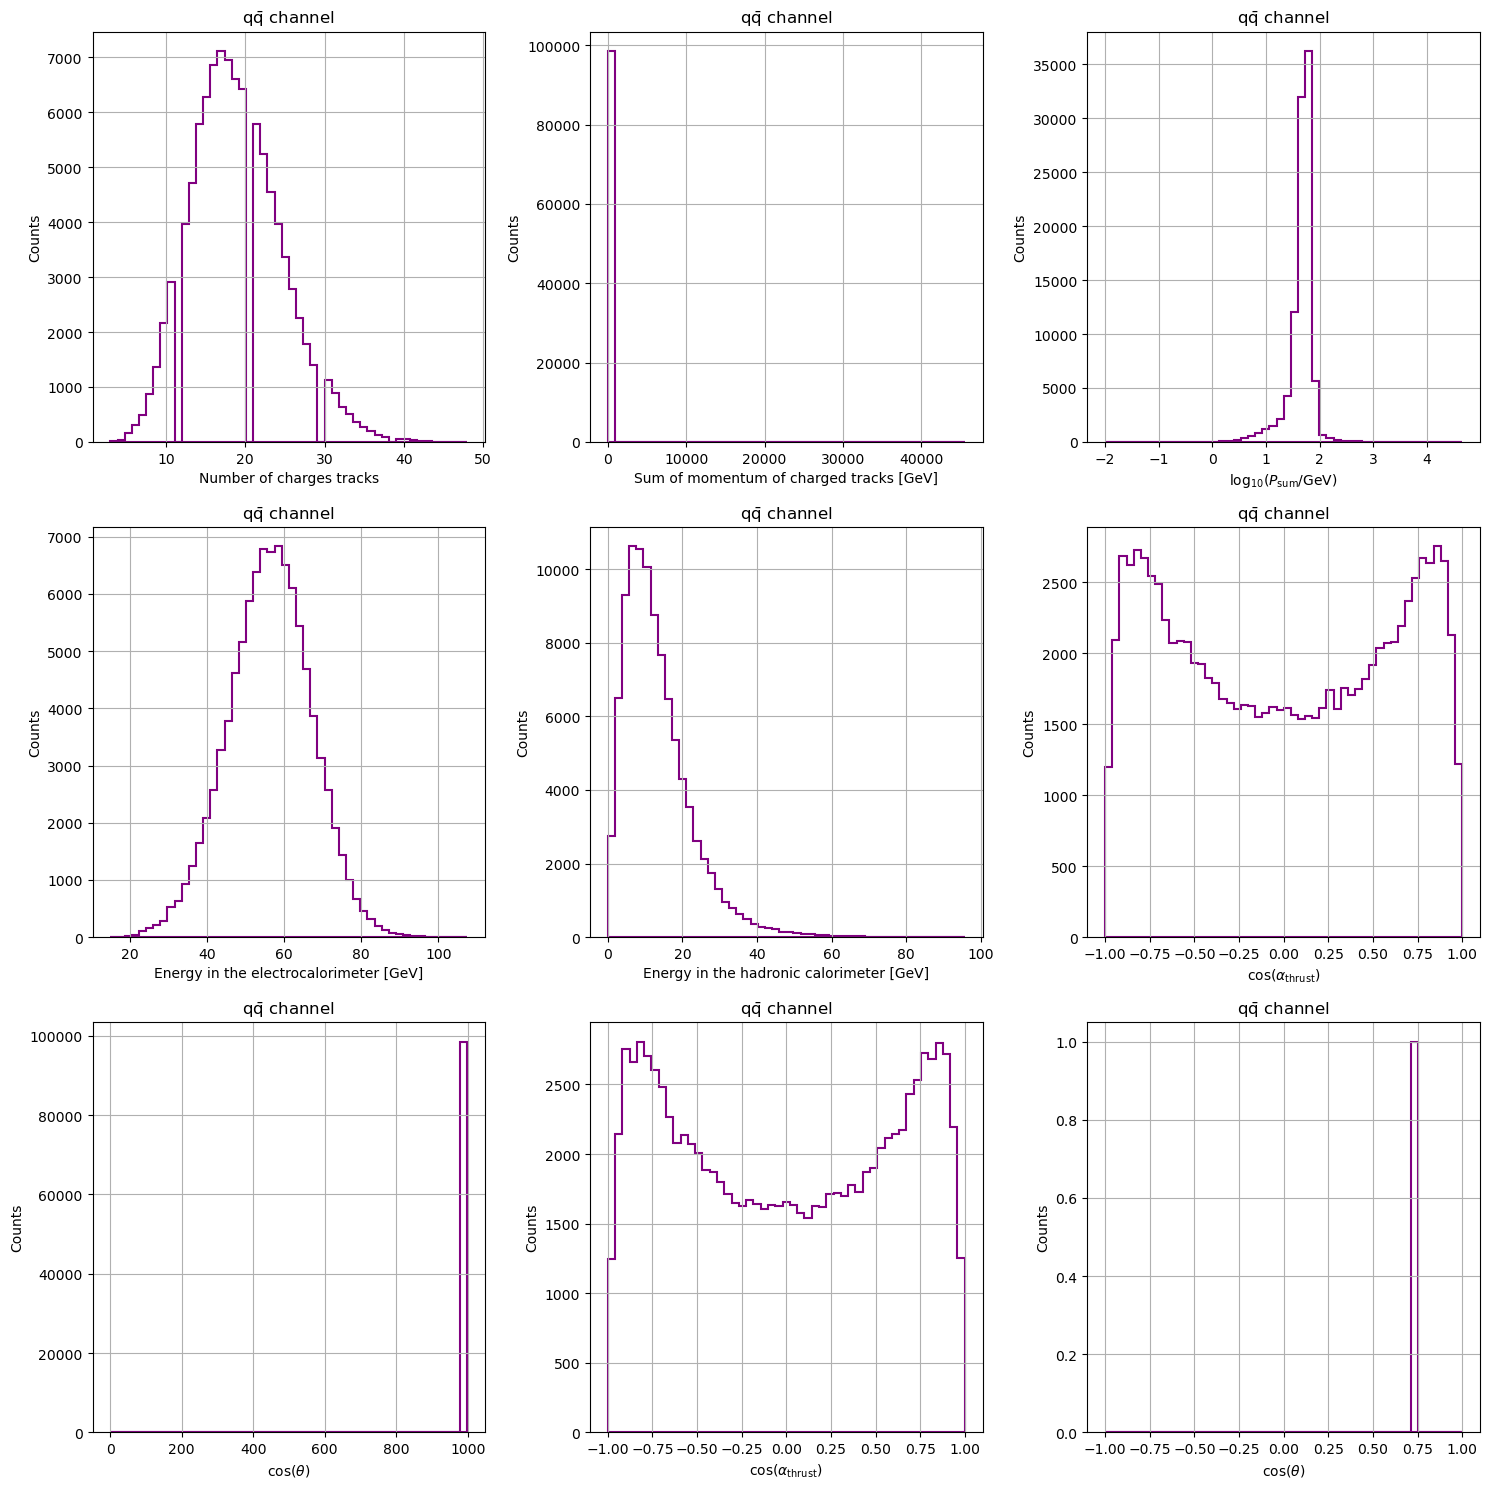

In [202]:
# Example for a single channel : qq
#file = uproot.open("../Data/MC/qq.root")
file = uproot.open("/".join((local_path,"qq.root")))
tree = file['h3'] #tree determines which data from which channel is being used for the histograms below

Ncharged = np.array(tree['Ncharged'].array())
Pcharged = np.array(tree['Pcharged'].array())
E_ecal = np.array(tree['E_ecal'].array())
E_hcal = np.array(tree['E_hcal'].array())
cos_thru = np.array(tree['cos_thru'].array())
cos_thet = np.array(tree['cos_thet'].array())

Ncharged_qq = Ncharged
Pcharged_qq = Pcharged
E_ecal_qq = E_ecal
E_hcal_qq = E_hcal
cos_thru_qq = cos_thru
cos_thet_qq = cos_thet


title = r"$\rm{q\bar{q}}$ channel"

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15)) ## Create a grid of figures
## Each axis in ax is accessed via matrix notation, e.g., ax[i,j]

ax[0,0].hist(Ncharged, bins=50,histtype='stepfilled',facecolor='none',edgecolor=qq_colour,linewidth=1.5)
ax[0,0].set_xlabel("Number of charges tracks")
ax[0,0].set_ylabel("Counts")
ax[0,0].set_title(title)

## If you want to generate just one figure for a quick check, you don't need to create fig and ax instances with plt.subplots()
## Instead, you might want to just use plt.plot() or plt.hist() like this:
"""
plt.hist(Ncharged,bins=50)
plt.xlabel("Number of charges tracks")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
"""
##

ax[0,1].hist(Pcharged, bins=50,histtype='stepfilled',facecolor='none',edgecolor=qq_colour,linewidth=1.5)
ax[0,1].set_xlabel("Sum of momentum of charged tracks [GeV]")
ax[0,1].set_ylabel("Counts")
ax[0,1].set_title(title)

ax[0,2].hist(np.log10(Pcharged+0.01), bins=50,histtype='stepfilled',facecolor='none',edgecolor=qq_colour,linewidth=1.5)
ax[0,2].set_xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
ax[0,2].set_ylabel("Counts")
ax[0,2].set_title(title)

ax[1,0].hist(E_ecal, bins=50,histtype='stepfilled',facecolor='none',edgecolor=qq_colour,linewidth=1.5)
ax[1,0].set_xlabel("Energy in the electrocalorimeter [GeV]")
ax[1,0].set_ylabel("Counts")
ax[1,0].set_title(title)

ax[1,1].hist(E_hcal, bins=50,histtype='stepfilled',facecolor='none',edgecolor=qq_colour,linewidth=1.5)
ax[1,1].set_xlabel("Energy in the hadronic calorimeter [GeV]")
ax[1,1].set_ylabel("Counts")
ax[1,1].set_title(title)

ax[1,2].hist(cos_thru, bins=50,histtype='stepfilled',facecolor='none',edgecolor=qq_colour,linewidth=1.5)
ax[1,2].set_xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
ax[1,2].set_ylabel("Counts")
ax[1,2].set_title(title)

ax[2,0].hist(cos_thet, bins=50,histtype='stepfilled',facecolor='none',edgecolor=qq_colour,linewidth=1.5)
ax[2,0].set_xlabel(r"$\cos(\theta)$")
ax[2,0].set_ylabel("Counts")
ax[2,0].set_title(title)

ax[2,1].hist(cos_thru, bins=np.linspace(-1,1,50),histtype='stepfilled',facecolor='none',edgecolor=qq_colour,linewidth=1.5)
ax[2,1].set_xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
ax[2,1].set_ylabel("Counts")
ax[2,1].set_title(title)

ax[2,2].hist(cos_thet, bins=np.linspace(-1,1,50),histtype='stepfilled',facecolor='none',edgecolor=qq_colour,linewidth=1.5)
ax[2,2].set_xlabel(r"$\cos(\theta)$")
ax[2,2].set_ylabel("Counts")
ax[2,2].set_title(title)

fig.tight_layout() ## So labels are not clipped
# fig.savefig("../Figures/example.pdf") or plt.savefig(<str /path/to/filename>) to save the figures

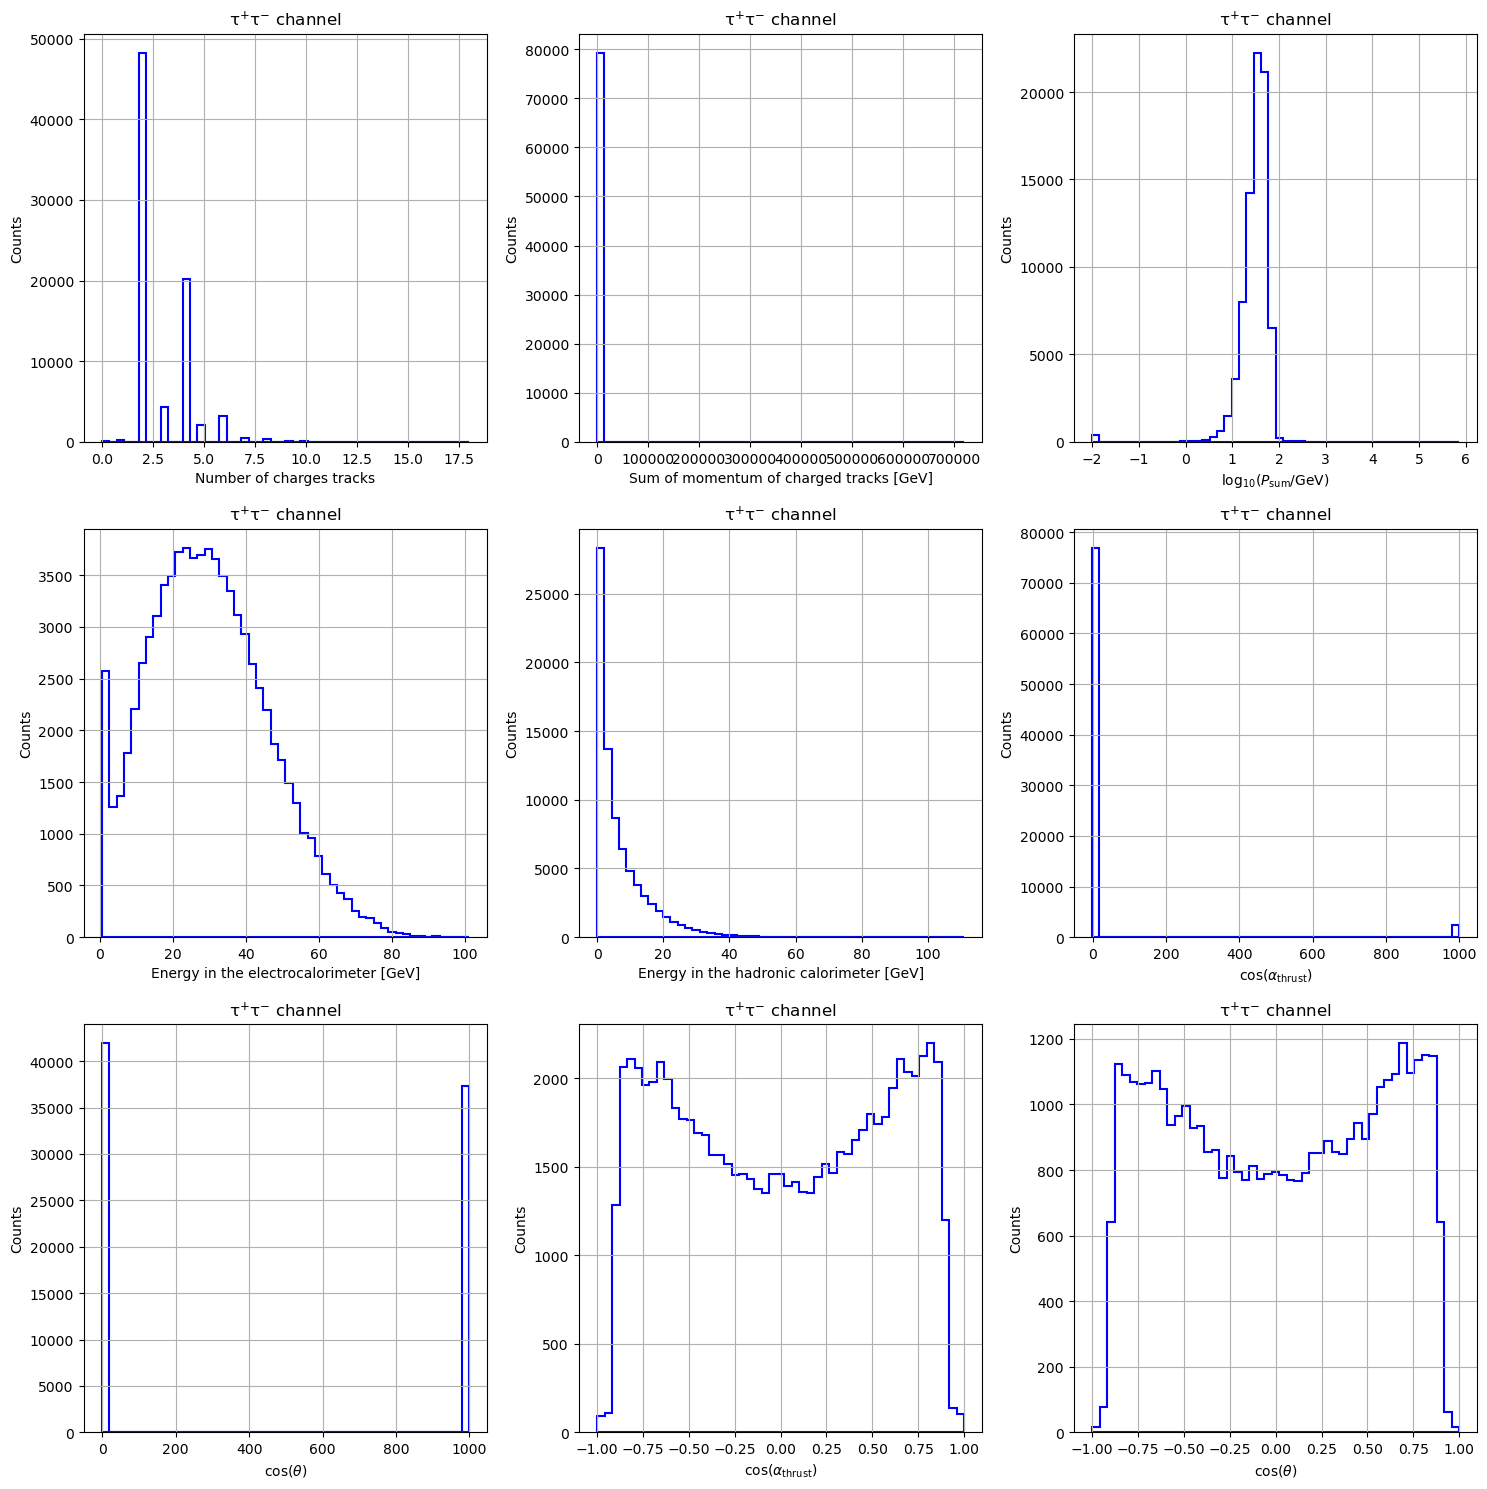

In [203]:
# tt 
# Example for a single channel:
#file = uproot.open("../Data/MC/tt.root")
file=uproot.open("/".join((local_path,"tt.root")))
tree = file['h3'] #tree determines which data from which channel is being used for the histograms below

Ncharged = np.array(tree['Ncharged'].array())
Pcharged = np.array(tree['Pcharged'].array())
E_ecal = np.array(tree['E_ecal'].array())
E_hcal = np.array(tree['E_hcal'].array())
cos_thru = np.array(tree['cos_thru'].array())
cos_thet = np.array(tree['cos_thet'].array())


Ncharged_tt = Ncharged
Pcharged_tt = Pcharged
E_ecal_tt = E_ecal
E_hcal_tt = E_hcal
cos_thru_tt = cos_thru
cos_thet_tt = cos_thet


title = r"$\rm{\tau^{+}\tau^{-}}$ channel"

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15)) ## Create a grid of figures
## Each axis in ax is accessed via matrix notation, e.g., ax[i,j]

ax[0,0].hist(Ncharged, bins=50,histtype='stepfilled',facecolor='none',edgecolor=tt_colour,linewidth=1.5)
ax[0,0].set_xlabel("Number of charges tracks")
ax[0,0].set_ylabel("Counts")
ax[0,0].set_title(title)

## If you want to generate just one figure for a quick check, you don't need to create fig and ax instances with plt.subplots()
## Instead, you might want to just use plt.plot() or plt.hist() like this:
"""
plt.hist(Ncharged,bins=50)
plt.xlabel("Number of charges tracks")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
"""
##

ax[0,1].hist(Pcharged, bins=50,histtype='stepfilled',facecolor='none',edgecolor=tt_colour,linewidth=1.5)
ax[0,1].set_xlabel("Sum of momentum of charged tracks [GeV]")
ax[0,1].set_ylabel("Counts")
ax[0,1].set_title(title)

ax[0,2].hist(np.log10(Pcharged+0.01), bins=50,histtype='stepfilled',facecolor='none',edgecolor=tt_colour,linewidth=1.5)
ax[0,2].set_xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
ax[0,2].set_ylabel("Counts")
ax[0,2].set_title(title)

ax[1,0].hist(E_ecal, bins=50,histtype='stepfilled',facecolor='none',edgecolor=tt_colour,linewidth=1.5)
ax[1,0].set_xlabel("Energy in the electrocalorimeter [GeV]")
ax[1,0].set_ylabel("Counts")
ax[1,0].set_title(title)

ax[1,1].hist(E_hcal, bins=50,histtype='stepfilled',facecolor='none',edgecolor=tt_colour,linewidth=1.5)
ax[1,1].set_xlabel("Energy in the hadronic calorimeter [GeV]")
ax[1,1].set_ylabel("Counts")
ax[1,1].set_title(title)

ax[1,2].hist(cos_thru, bins=50,histtype='stepfilled',facecolor='none',edgecolor=tt_colour,linewidth=1.5)
ax[1,2].set_xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
ax[1,2].set_ylabel("Counts")
ax[1,2].set_title(title)

ax[2,0].hist(cos_thet, bins=50,histtype='stepfilled',facecolor='none',edgecolor=tt_colour,linewidth=1.5)
ax[2,0].set_xlabel(r"$\cos(\theta)$")
ax[2,0].set_ylabel("Counts")
ax[2,0].set_title(title)

ax[2,1].hist(cos_thru, bins=np.linspace(-1,1,50),histtype='stepfilled',facecolor='none',edgecolor=tt_colour,linewidth=1.5)
ax[2,1].set_xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
ax[2,1].set_ylabel("Counts")
ax[2,1].set_title(title)

ax[2,2].hist(cos_thet, bins=np.linspace(-1,1,50),histtype='stepfilled',facecolor='none',edgecolor=tt_colour,linewidth=1.5)
ax[2,2].set_xlabel(r"$\cos(\theta)$")
ax[2,2].set_ylabel("Counts")
ax[2,2].set_title(title)

fig.tight_layout() ## So labels are not clipped
# fig.savefig("../Figures/example.pdf") or plt.savefig(<str /path/to/filename>) to save the figures

### Exercises

2.1.0. Every plot in this protocol/example notebook has been plotted with the standard style options. Are these the best options in general? For each case? Do you think you can come up with better looking/easier to read plots?
    -> I think adding a grid to the plots will make it clearer to read since this will also tell you if a plot is using a logarithmic scale. In terms of personal preference I would also abstain from using the default blue color of python because it becomes very bland if you look at it for very long. Additionally, the sum of charged momentum tracks in [GeV] and its axis is chosen far too long with 50000, which is an amount of energy that is never recorded. Thats why in the [0,1] plot, there is only a single bin stuck at the beginning with max counts. All recorded events are basically merged into a single bin.

2.1.1. Obtain the same histograms for the other three channels (the input root files are located in the same folder and can be accessed the same way).

2.1.2. Come up with a nice way to show the comparison between the four channels
    - group the respective plots for the channels
    - Create a master plot with all four channels in each plot. The idea is to superimpose all of the above 9-plot assemblies into one that is color coded

## MASTER HISTOGRAM - containing all 4 channels

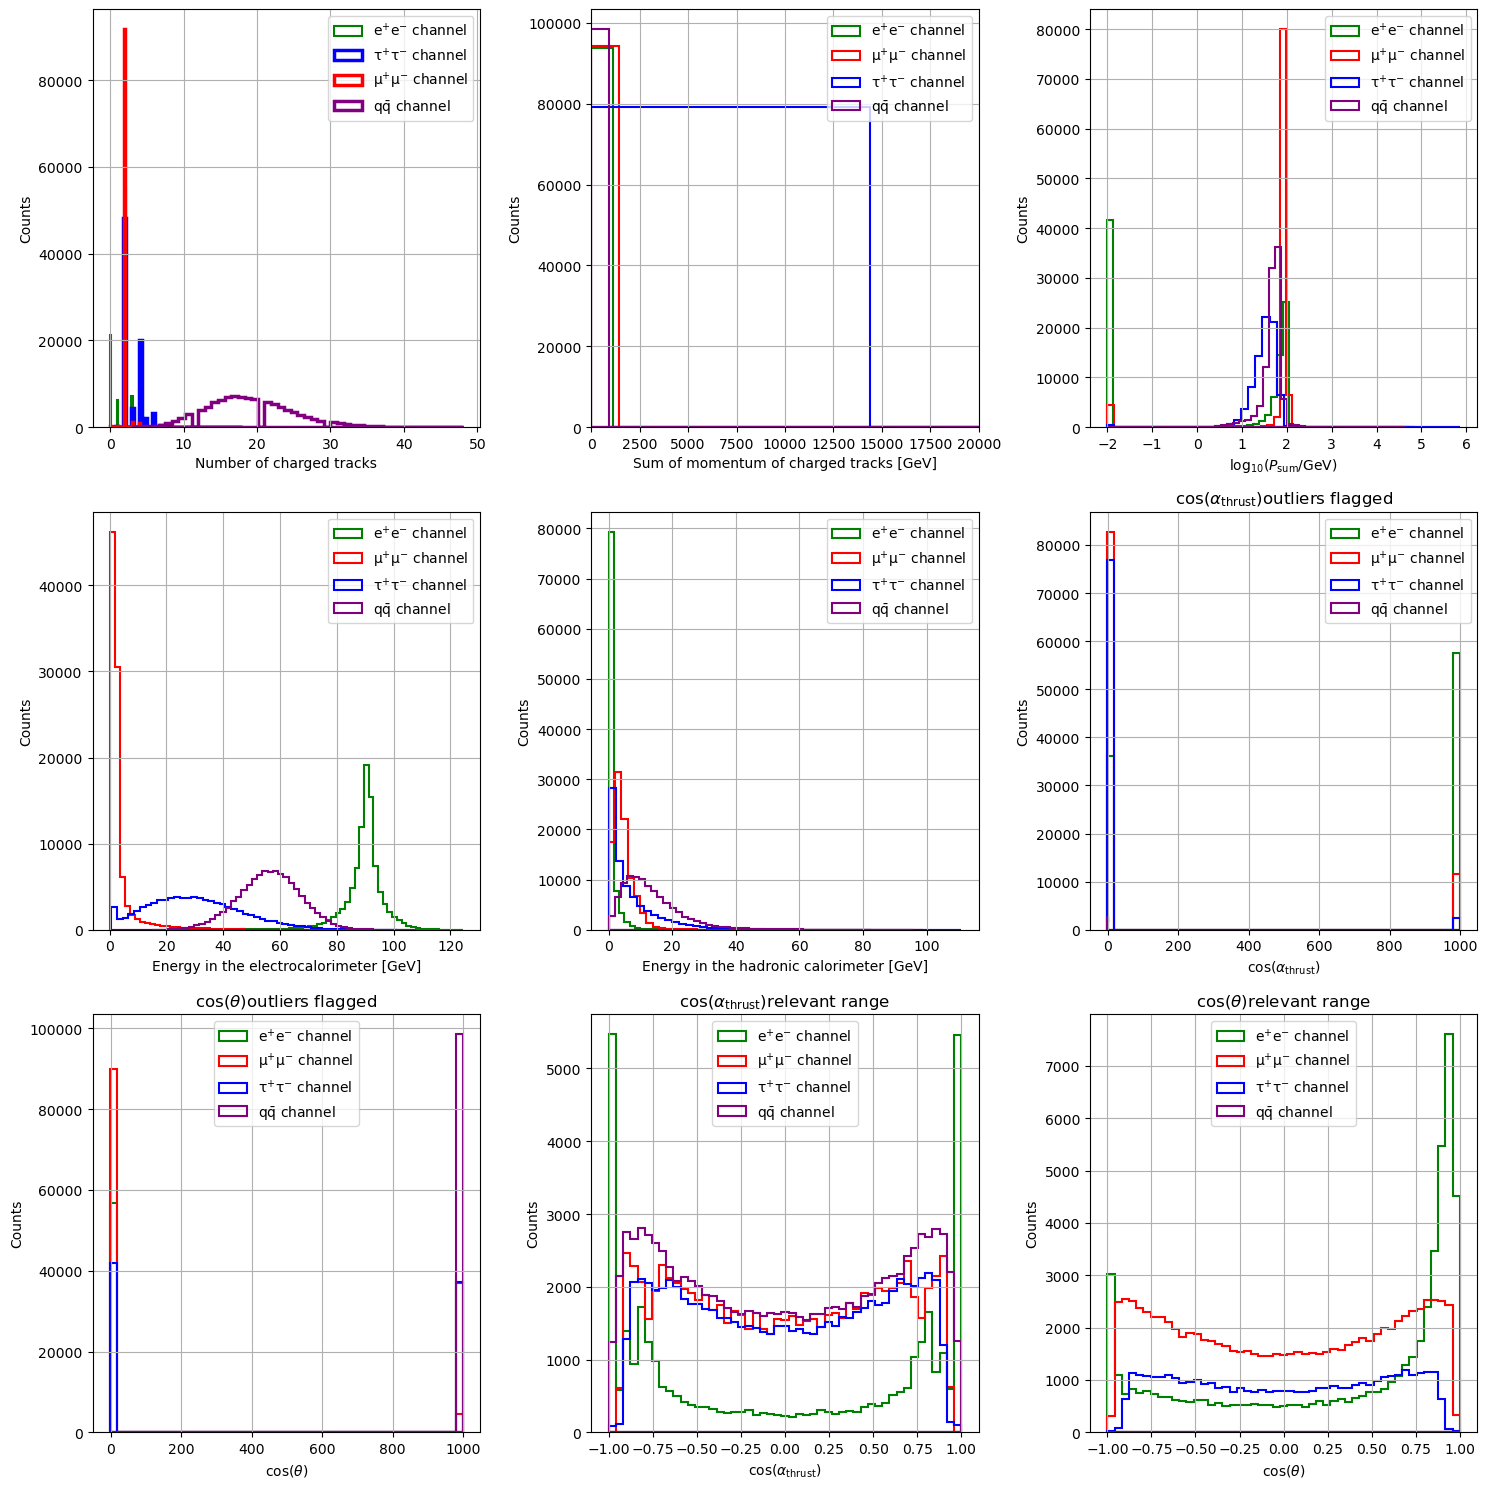

In [204]:
# First plot with all the legends and labels is the master plot prototype for all the other comparison plots


#  MASTER PLOT  


# Set up the title and master figure
title = r"4-channel overlap"
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Plot for Ncharged counts (original master plot)
ax[0,0].hist(Ncharged_ee, bins=50, histtype='stepfilled', facecolor='none', edgecolor=ee_colour, linewidth=1.5, label=r"$\rm{e^{+}e^{-}}$ channel")
ax[0,0].hist(Ncharged_tt, bins=50, histtype='stepfilled', facecolor='none', edgecolor=tt_colour, linewidth=2.5, label=r"$\rm{\tau^{+}\tau^{-}}$ channel")
ax[0,0].hist(Ncharged_mm, bins=50, histtype='stepfilled', facecolor='none', edgecolor=mm_colour, linewidth=2.5, label=r"$\rm{\mu^{+}\mu^{-}}$ channel")
ax[0,0].hist(Ncharged_qq, bins=50, histtype='stepfilled', facecolor='none', edgecolor=qq_colour, linewidth=2.5, label=r"$\rm{q\bar{q}}$ channel")
ax[0,0].set_xlabel("Number of charged tracks")
ax[0,0].set_ylabel("Counts")
#ax[0,0].set_title(title)
ax[0,0].legend()

# Sum of momentum of charged tracks
ax[0,1].hist(Pcharged_ee, bins=50, histtype='stepfilled', facecolor='none', edgecolor=ee_colour, linewidth=1.5, label=r"$\rm{e^{+}e^{-}}$ channel")
ax[0,1].hist(Pcharged_mm, bins=50, histtype='stepfilled', facecolor='none', edgecolor=mm_colour, linewidth=1.5, label=r"$\rm{\mu^{+}\mu^{-}}$ channel")
ax[0,1].hist(Pcharged_tt, bins=50, histtype='stepfilled', facecolor='none', edgecolor=tt_colour, linewidth=1.5, label=r"$\rm{\tau^{+}\tau^{-}}$ channel")
ax[0,1].hist(Pcharged_qq, bins=50, histtype='stepfilled', facecolor='none', edgecolor=qq_colour, linewidth=1.5, label=r"$\rm{q\bar{q}}$ channel")
ax[0,1].set_xlabel("Sum of momentum of charged tracks [GeV]")
ax[0,1].set_ylabel("Counts")
ax[0,1].set_xlim(0,20000)
#ax[0,1].set_title(title)
ax[0,1].legend()

# Log-scaled momentum sum
ax[0,2].hist(np.log10(Pcharged_ee + 0.01), bins=50, histtype='stepfilled', facecolor='none', edgecolor=ee_colour, linewidth=1.5, label=r"$\rm{e^{+}e^{-}}$ channel")
ax[0,2].hist(np.log10(Pcharged_mm + 0.01), bins=50, histtype='stepfilled', facecolor='none', edgecolor=mm_colour, linewidth=1.5, label=r"$\rm{\mu^{+}\mu^{-}}$ channel")
ax[0,2].hist(np.log10(Pcharged_tt + 0.01), bins=50, histtype='stepfilled', facecolor='none', edgecolor=tt_colour, linewidth=1.5, label=r"$\rm{\tau^{+}\tau^{-}}$ channel")
ax[0,2].hist(np.log10(Pcharged_qq + 0.01), bins=50, histtype='stepfilled', facecolor='none', edgecolor=qq_colour, linewidth=1.5, label=r"$\rm{q\bar{q}}$ channel")
ax[0,2].set_xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
ax[0,2].set_ylabel("Counts")
#ax[0,2].set_title(title)
ax[0,2].legend()

# Energy in the electrocalorimeter
ax[1,0].hist(E_ecal_ee, bins=50, histtype='stepfilled', facecolor='none', edgecolor=ee_colour, linewidth=1.5, label=r"$\rm{e^{+}e^{-}}$ channel")
ax[1,0].hist(E_ecal_mm, bins=50, histtype='stepfilled', facecolor='none', edgecolor=mm_colour, linewidth=1.5, label=r"$\rm{\mu^{+}\mu^{-}}$ channel")
ax[1,0].hist(E_ecal_tt, bins=50, histtype='stepfilled', facecolor='none', edgecolor=tt_colour, linewidth=1.5, label=r"$\rm{\tau^{+}\tau^{-}}$ channel")
ax[1,0].hist(E_ecal_qq, bins=50, histtype='stepfilled', facecolor='none', edgecolor=qq_colour, linewidth=1.5, label=r"$\rm{q\bar{q}}$ channel")
ax[1,0].set_xlabel("Energy in the electrocalorimeter [GeV]")
ax[1,0].set_ylabel("Counts")
#ax[1,0].set_title(title)
ax[1,0].legend()

# Energy in the hadronic calorimeter
ax[1,1].hist(E_hcal_ee, bins=50, histtype='stepfilled', facecolor='none', edgecolor=ee_colour, linewidth=1.5, label=r"$\rm{e^{+}e^{-}}$ channel")
ax[1,1].hist(E_hcal_mm, bins=50, histtype='stepfilled', facecolor='none', edgecolor=mm_colour, linewidth=1.5, label=r"$\rm{\mu^{+}\mu^{-}}$ channel")
ax[1,1].hist(E_hcal_tt, bins=50, histtype='stepfilled', facecolor='none', edgecolor=tt_colour, linewidth=1.5, label=r"$\rm{\tau^{+}\tau^{-}}$ channel")
ax[1,1].hist(E_hcal_qq, bins=50, histtype='stepfilled', facecolor='none', edgecolor=qq_colour, linewidth=1.5, label=r"$\rm{q\bar{q}}$ channel")
ax[1,1].set_xlabel("Energy in the hadronic calorimeter [GeV]")
ax[1,1].set_ylabel("Counts")
#ax[1,1].set_title(title)
ax[1,1].legend()

# Cosine of thrust angle
ax[1,2].hist(cos_thru_ee, bins=50, histtype='stepfilled', facecolor='none', edgecolor=ee_colour, linewidth=1.5, label=r"$\rm{e^{+}e^{-}}$ channel")
ax[1,2].hist(cos_thru_mm, bins=50, histtype='stepfilled', facecolor='none', edgecolor=mm_colour, linewidth=1.5, label=r"$\rm{\mu^{+}\mu^{-}}$ channel")
ax[1,2].hist(cos_thru_tt, bins=50, histtype='stepfilled', facecolor='none', edgecolor=tt_colour, linewidth=1.5, label=r"$\rm{\tau^{+}\tau^{-}}$ channel")
ax[1,2].hist(cos_thru_qq, bins=50, histtype='stepfilled', facecolor='none', edgecolor=qq_colour, linewidth=1.5, label=r"$\rm{q\bar{q}}$ channel")
ax[1,2].set_xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
ax[1,2].set_ylabel("Counts")
ax[1,2].set_title(r"$\cos(\alpha_{\rm{thrust}})$" "outliers flagged")
ax[1,2].legend()

# Cosine of theta angle
ax[2,0].hist(cos_thet_ee, bins=50, histtype='stepfilled', facecolor='none', edgecolor=ee_colour, linewidth=1.5, label=r"$\rm{e^{+}e^{-}}$ channel")
ax[2,0].hist(cos_thet_mm, bins=50, histtype='stepfilled', facecolor='none', edgecolor=mm_colour, linewidth=1.5, label=r"$\rm{\mu^{+}\mu^{-}}$ channel")
ax[2,0].hist(cos_thet_tt, bins=50, histtype='stepfilled', facecolor='none', edgecolor=tt_colour, linewidth=1.5, label=r"$\rm{\tau^{+}\tau^{-}}$ channel")
ax[2,0].hist(cos_thet_qq, bins=50, histtype='stepfilled', facecolor='none', edgecolor=qq_colour, linewidth=1.5, label=r"$\rm{q\bar{q}}$ channel")
ax[2,0].set_xlabel(r"$\cos(\theta)$")
ax[2,0].set_ylabel("Counts")
ax[2,0].set_title(r"$\cos(\theta)$" "outliers flagged")
ax[2,0].legend(loc='upper center')

# Cosine of thrust angle (limited range)
ax[2,1].hist(cos_thru_ee, bins=np.linspace(-1, 1, 50), histtype='stepfilled', facecolor='none', edgecolor=ee_colour, linewidth=1.5, label=r"$\rm{e^{+}e^{-}}$ channel")
ax[2,1].hist(cos_thru_mm, bins=np.linspace(-1, 1, 50), histtype='stepfilled', facecolor='none', edgecolor=mm_colour, linewidth=1.5, label=r"$\rm{\mu^{+}\mu^{-}}$ channel")
ax[2,1].hist(cos_thru_tt, bins=np.linspace(-1, 1, 50), histtype='stepfilled', facecolor='none', edgecolor=tt_colour, linewidth=1.5, label=r"$\rm{\tau^{+}\tau^{-}}$ channel")
ax[2,1].hist(cos_thru_qq, bins=np.linspace(-1, 1, 50), histtype='stepfilled', facecolor='none', edgecolor=qq_colour, linewidth=1.5, label=r"$\rm{q\bar{q}}$ channel")
ax[2,1].set_xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
ax[2,1].set_ylabel("Counts")
ax[2,1].set_title(r"$\cos(\alpha_{\rm{thrust}})$" "relevant range")
ax[2,1].legend(loc='upper center')

# Cosine of theta angle (limited range)
ax[2,2].hist(cos_thet_ee, bins=np.linspace(-1, 1, 50), histtype='stepfilled', facecolor='none', edgecolor=ee_colour, linewidth=1.5, label=r"$\rm{e^{+}e^{-}}$ channel")
ax[2,2].hist(cos_thet_mm, bins=np.linspace(-1, 1, 50), histtype='stepfilled', facecolor='none', edgecolor=mm_colour, linewidth=1.5, label=r"$\rm{\mu^{+}\mu^{-}}$ channel")
ax[2,2].hist(cos_thet_tt, bins=np.linspace(-1, 1, 50), histtype='stepfilled', facecolor='none', edgecolor=tt_colour, linewidth=1.5, label=r"$\rm{\tau^{+}\tau^{-}}$ channel")
ax[2,2].hist(cos_thet_qq, bins=np.linspace(-1, 1, 50), histtype='stepfilled', facecolor='none', edgecolor=qq_colour, linewidth=1.5, label=r"$\rm{q\bar{q}}$ channel")
ax[2,2].set_xlabel(r"$\cos(\theta)$")
ax[2,2].set_ylabel("Counts")
ax[2,2].set_title(r"$\cos(\theta)$" "relevant range")
ax[2,2].legend(loc='upper center')


fig.tight_layout()  



## Part 2.2 - Separating s-t channels

For $\rm{e^{+}e^{-}}$ channel, not only annihiliation processes (s-channel) are present, but also scattering processes (t-channel). Nevertheless, the Z0 boson can only be produced in the first one and, thus, only those events contribute to the decay width. For that reason, those events must also be selected out.

The two channels differ on their angular distribution:

 
 $\frac{d\sigma}{d\Omega} \alpha \left\{\begin{array}{@{}lr@{}}
        1+\cos^2(\theta), & \text{s-channel}\\
        (1-\cos \theta)^{-2}, & \text{t-channel}\\
       \end{array}\right.$

the original latex doesnt render for me
could be an issues with MathJax, which Jupyter uses to render latex code
the below works


$$
\frac{d\sigma}{d\Omega} \propto
\begin{cases} 
1 + \cos^2(\theta), & \text{s-channel} \\ 
(1 - \cos \theta)^{-2}, & \text{t-channel} 
\end{cases}
$$


- to separate the s- and t-channel, we take a region in theta that is advantageous, by using a mask
- [-0.9,0.5]

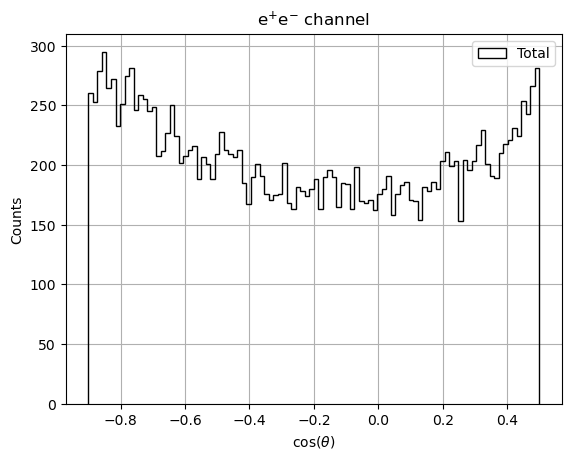

In [205]:
file=uproot.open("/".join((local_path,"ee.root")))
#file = uproot.open("../Data/MC/ee.root")
tree = file['h3']

cos_thet = np.array(tree['cos_thet'].array())

# A first safe cos_theta cut must be applied

mask_safe = (cos_thet>-0.9) & (cos_thet<0.5)

data_hist = plt.hist(cos_thet[mask_safe],bins=np.linspace(-0.9,0.5,101),color='black',label='Total',histtype='step')
plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

We now define a fit function of the type:

$a (1+\cos^2(\theta)) + b (1-\cos \theta)^2$

where $a$ and $b$ are free parameters

In [206]:
def fitFunction(x,a,b):
    first_term = a * (1 + x**2)
    second_term = b * 1 / (1 - x)**2
    result = first_term + second_term
    return result

In [207]:
## Fit and define arrays
popt, pcov = curve_fit(fitFunction, data_hist[1][:-1] + (data_hist[1][1] - data_hist[1][0])/2., data_hist[0], bounds=(0,10000))
print("----------------------------------------------------")
print("Fitted parameters:")
print(f"a = {popt[0]} +- { np.sqrt(np.diag(pcov))[0] }")
print(f"b = {popt[1]} +- { np.sqrt(np.diag(pcov))[1] }")
print("----------------------------------------------------")

cos_theta = np.linspace(-0.9, 0.5, 101)

s_counts = popt[0] * (1 + cos_theta**2)
s_upper_bound = (popt[0] + np.sqrt(np.diag(pcov))[0]) * (1 + cos_theta**2) 
s_lower_bound = (popt[0] - np.sqrt(np.diag(pcov))[0]) * (1 + cos_theta**2)

t_counts = popt[1] * 1 / (1 - cos_theta)**2
t_upper_bound = (popt[1] + np.sqrt(np.diag(pcov))[1]) * 1 / (1 - cos_theta)**2
t_lower_bound = (popt[1] - np.sqrt(np.diag(pcov))[1]) * 1 / (1 - cos_theta)**2

----------------------------------------------------
Fitted parameters:
a = 156.06058078482886 +- 1.7458652007438586
b = 16.390767624930476 +- 1.5615445947288125
----------------------------------------------------


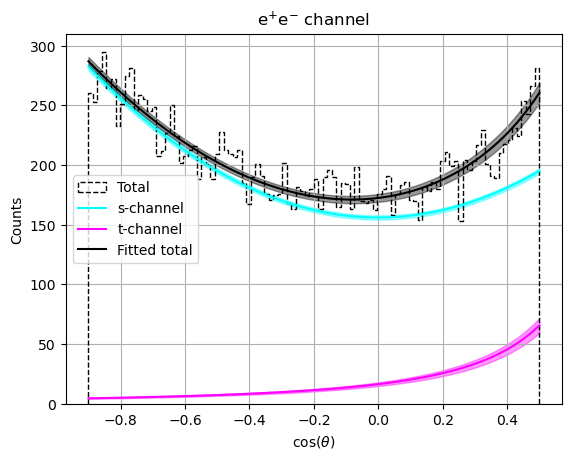

In [208]:
## Now plot everything:
plt.hist(cos_thet[mask_safe], bins=cos_theta, color='black', label='Total', histtype='step', linestyle='--')

plt.plot(cos_theta, s_counts, label='s-channel',color='cyan')
plt.fill_between(cos_theta, s_lower_bound, s_upper_bound, alpha=0.4, color='cyan')

plt.plot(cos_theta, t_counts, label='t-channel', color='magenta')
plt.fill_between(cos_theta, t_lower_bound, t_upper_bound, alpha=0.4, color='magenta')

plt.plot(cos_theta, s_counts + t_counts, color='black', label='Fitted total')
plt.fill_between(cos_theta, s_lower_bound + t_lower_bound, s_upper_bound + t_upper_bound, alpha=0.4, color='black')

plt.xlabel(r"$\cos(\theta)$")
plt.ylabel("Counts")
plt.title(r"$\rm{e^{+}e^{-}}$ channel")
plt.legend()
plt.show()

### Exercises

Using the results of the fit:

2.2.1. Calculate the fraction of s-channel events in the region $\cos \theta \in [-0.9,0.5]$

2.2.2. Calculate the total number of s-channel events in $\cos \theta \in [-1,1]$

In [209]:
fracSChannel = (np.sum(s_counts))/(np.sum(s_counts + t_counts))
#fracSChannel = (np.sum(s_counts))/(1e5)
print(f'The fraction of s-channel events is: {fracSChannel}') 

The fraction of s-channel events is: 0.9152666980961905


In [210]:
s_counts_fullrange = popt[0] * (1 + np.linspace(-1, 1, 101)**2)
s_counts_sum = np.sum(s_counts_fullrange)
print(f'The total number of s-channel events in the full angle range from -1 to 1 is: {s_counts_sum}')

# Granted, that "use result of fit" actually means we can just sum up the linspace evaluated at the positions that were also used to estimate the FRACTION of s channel events. Otherwise, the fit function for the s channel has to be used to select 
# data points from the actual recorded data to then later sum THOSE up

The total number of s-channel events in the full angle range from -1 to 1 is: 21121.23900341874


In [211]:
fracSChannel = fracSChannel # Substitute our s_channel fraction in the partial angle range 
totalSChannel = s_counts_sum # Substituted our s_channel total number of events

## Part 2.3 - Defining selection cuts

As we just learned, events cannot be singularly defined, but they can be defined by their distributions. The idea of this part is to come up with four sets of cuts to separate the four channels

In [212]:
# Example for a single channel (e+e-)
#file = uproot.open("../Data/MC/ee.root")
file=uproot.open("/".join((local_path,"ee.root")))
tree = file['h3']

Ncharged = np.array(tree['Ncharged'].array())
Pcharged = np.array(tree['Pcharged'].array())
E_ecal = np.array(tree['E_ecal'].array())
E_hcal = np.array(tree['E_hcal'].array())
cos_thru = np.array(tree['cos_thru'].array())
cos_thet = np.array(tree['cos_thet'].array())

mask_safe = mask_safe = (cos_thet>-0.9) & (cos_thet<0.5) # If looking for ee, this cut must be kept due to the s-t contamination! For other channels this can (and maybe should) be taken out
mask = (mask_safe) & (Ncharged > 2) & (Ncharged < 10) & (cos_thru > -0.7) & (E_ecal < 100) # completely random cuts, just to show the syntax needed!

# electron positron
mask_ee = (mask_safe) & (Ncharged_ee < 4)  & (E_ecal_ee > 75) & (E_hcal_ee < 5) #& (Pcharged>75) & (Pcharged<1)

# mm channel
mask_mm = (Ncharged_mm == 2) & (Pcharged_mm > 70) & (E_ecal_mm < 15) & (E_hcal_mm < 15)

#tt channel
mask_tt = (Ncharged_tt < 7) & (Pcharged_tt < 50) & (E_ecal_tt > 10) & (E_ecal_tt < 50)

# qq channel
mask_qq = (Ncharged_qq > 10)


#print(f"{len(E_ecal[mask])/len(E_ecal)} ({len(E_ecal[mask])}/{len(E_ecal)}) events of channel ee surviving example random cuts")
#print(f"{len(E_ecal[mask])/100000} ({len(E_ecal[mask])}/100000) events of channel ee surviving example random cuts")

# Explanation on the selection cuts and why the values are what they are:
# 1) mask_safe is only angle resolved cutting
# 2) Find distinguishing criteria for different decay channels that try to isolate the channel as well as possible without giving too many false positives from other channels.
    # caveat: This is the highest precision approach. Maximum precision migh not always be ideal (i.e. cuts that are too restrictive reduce the sample size too much -> More stochastic errors, while imprecise cuts lead to more systematic errors)
# 3) Example: Ncharged == 2 for muons makes sense, always 2 of them after scattering -> Distinct difference to the rest of the channels


# Trying to estimate the selection cuts for acceptance, background and efficiency. Acceptance is ## of masked events vs total events for that channel.
print(f"{len(E_ecal_ee[mask_safe])/len(E_ecal_ee)*100:.2f}%  ({len(E_ecal_ee[mask_safe])}/{len(E_ecal_ee)}) : Acceptance of ee channel events remaining after angle resolved cut")
print(f"{len(E_ecal_ee[mask_ee])/len(E_ecal_ee)*100:.2f}% ({len(E_ecal_ee[mask_ee])}/{len(E_ecal_ee)}) : Acceptance of ee channel events remaining after composite cut with all restrictions")
print(f"{len(E_ecal_ee[mask_ee])/len(E_ecal_ee[mask_safe])*100:.2f}% ({len(E_ecal_ee[mask_ee])}/{len(E_ecal_ee[mask_safe])}) : Acceptance of full selection cut vs. only-angle-resolved, i.e. particle property specific loss compared to angle-only case")


21.89%  (20531/93802) : Acceptance of ee channel events remaining after angle resolved cut
21.44% (20115/93802) : Acceptance of ee channel events remaining after composite cut with all restrictions
97.97% (20115/20531) : Acceptance of full selection cut vs. only-angle-resolved, i.e. particle property specific loss compared to angle-only case


In [213]:
print(len(E_ecal_ee),len(E_hcal_ee),len(Ncharged)) #chechking length of all property arrays is the same for any given eventnp.zeros

93802 93802 93802


In [214]:
# Calculating all false positives

#xx_yy data for particle type xx identified by the selection cut for type xx, but could also be yy because the criteria are met there aswell

#False positives: ee that could be seen as mm aswell
counter = 0
for i in range(len(E_ecal_ee)):
    if (Ncharged_ee[i] == 2) & (Pcharged_ee[i] > 70) & (E_ecal_ee[i] < 15) & (E_hcal_ee[i] < 15):
        counter = counter + 1
ee_mm = counter/len(E_ecal_ee)
        
#False positives: ee that could be seen as tt aswell
counter = 0
for i in range(len(E_ecal_ee)):
    if (Ncharged_ee[i] < 7) & (Pcharged_ee[i] < 50) & (E_ecal_ee[i] > 10) & (E_ecal_ee[i] < 50):
        counter = counter + 1
ee_tt = counter/len(E_ecal_ee)

#False positives: ee that could be seen as qq aswell
counter = 0
for i in range(len(E_ecal_ee)):
    if (Ncharged_ee[i] > 10):
        counter = counter + 1
ee_qq = counter/len(E_ecal_ee)





#False positives: mm that could be seen as ee aswell
counter = 0
for i in range(len(E_ecal_mm)):
    if (cos_thet_mm[i]>-0.9) & (cos_thet_mm[i]<0.5) & (Ncharged_mm[i] < 4)  & (E_ecal_mm[i] > 75) & (E_hcal_mm[i] < 5):
        counter = counter + 1
mm_ee = counter/len(E_ecal_mm)
        
#False positives: mm that could be seen as tt aswell
counter = 0
for i in range(len(E_ecal_mm)):
    if (Ncharged_mm[i] < 7) & (Pcharged_mm[i] < 50) & (E_ecal_mm[i] > 10) & (E_ecal_mm[i] < 50):
        counter = counter + 1
mm_tt = counter/len(E_ecal_mm)

#False positives: mm that could be seen as qq aswell
counter = 0
for i in range(len(E_ecal_mm)):
    if (Ncharged_mm[i] > 10):
        counter = counter + 1
mm_qq = counter/len(E_ecal_mm)





#False positives: tt that could be seen as ee aswell
counter = 0
for i in range(len(E_ecal_tt)):
    if (cos_thet_tt[i]>-0.9) & (cos_thet_tt[i]<0.5) & (Ncharged_tt[i] < 4)  & (E_ecal_tt[i] > 75) & (E_hcal_tt[i] < 5):
        counter = counter + 1
tt_ee = counter/len(E_ecal_tt)
        
#False positives: tt that could be seen as mm aswell
counter = 0
for i in range(len(E_ecal_tt)):
    if (Ncharged_tt[i] == 2) & (Pcharged_tt[i] > 70) & (E_ecal_tt[i] < 15) & (E_hcal_tt[i] < 15):
        counter = counter + 1
tt_mm = counter/len(E_ecal_tt)

#False positives: tt that could be seen as qq aswell
counter = 0
for i in range(len(E_ecal_tt)):
    if (Ncharged_tt[i] > 10):
        counter = counter + 1
tt_qq = counter/len(E_ecal_tt)






#False positives: qq that could be seen as ee aswell
counter = 0
for i in range(len(E_ecal_qq)):
    if (cos_thet_qq[i]>-0.9) & (cos_thet_qq[i]<0.5) & (Ncharged_qq[i] < 4)  & (E_ecal_qq[i] > 75) & (E_hcal_qq[i] < 5):
        counter = counter + 1
qq_ee = counter/len(E_ecal_qq)
        
#False positives: qq that could be seen as mm aswell
counter = 0
for i in range(len(E_ecal_qq)):
    if (Ncharged_qq[i] == 2) & (Pcharged_qq[i] > 70) & (E_ecal_qq[i] < 15) & (E_hcal_qq[i] < 15):
        counter = counter + 1
qq_mm = counter/len(E_ecal_qq)

#False positives: qq that could be seen as tt aswell
counter = 0
for i in range(len(E_ecal_qq)):
    if (Ncharged_qq[i] < 7) & (Pcharged_qq[i] < 50) & (E_ecal_qq[i] > 10) & (E_ecal_qq[i] < 50):
        counter = counter + 1
qq_tt = counter/len(E_ecal_qq)
        



# ee dataset evaluation
ee_ee = len(E_ecal_ee[mask_ee])/len(E_ecal_ee)
#ee_mm = len(E_ecal_ee[mask_mm])/len(E_ecal_ee)
#ee_tt = len(E_ecal_ee[mask_tt])/len(E_ecal_ee)
#ee_qq = len(E_ecal_ee[mask_qq])/len(E_ecal_ee)

# mm dataset evaluation
#mm_ee = len(E_ecal_mm[mask_ee])/len(E_ecal_mm)
mm_mm = len(E_ecal_mm[mask_mm])/len(E_ecal_mm)
#mm_tt = len(E_ecal_mm[mask_tt])/len(E_ecal_mm)
#mm_qq = len(E_ecal_mm[mask_qq])/len(E_ecal_mm)

# tt dataset evaluation
#tt_ee = len(E_ecal_tt[mask_ee])/len(E_ecal_tt)
#tt_mm = len(E_ecal_tt[mask_mm])/len(E_ecal_tt)
tt_tt = len(E_ecal_tt[mask_tt])/len(E_ecal_tt)
#tt_qq = len(E_ecal_tt[mask_qq])/len(E_ecal_tt)

# ee dataset evaluation
#qq_ee = len(E_ecal_qq[mask_ee])/len(E_ecal_qq)
#qq_mm = len(E_ecal_qq[mask_mm])/len(E_ecal_qq)
#qq_tt = len(E_ecal_qq[mask_tt])/len(E_ecal_qq)
qq_qq = len(E_ecal_qq[mask_qq])/len(E_ecal_qq)


# Now give values
matrix = np.array([[ee_ee,mm_ee,tt_ee,qq_ee],
                   [ee_mm,mm_mm,tt_mm,qq_mm],
                   [ee_tt,mm_mm,tt_tt,qq_mm],
                   [ee_qq,mm_qq,tt_qq,qq_qq]])

print(matrix) # Praise the lord


[[2.14441057e-01 0.00000000e+00 1.31289923e-03 0.00000000e+00]
 [0.00000000e+00 8.76691283e-01 8.33186053e-04 0.00000000e+00]
 [5.65019936e-04 8.76691283e-01 6.23235792e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.97298457e-04 9.44979353e-01]]


## Acceptance matrix
- normalised to 0,1

In [215]:
# Now give values
acceptance_Matrix_normalised=matrix

In [216]:
matrix - acceptance_Matrix_normalised

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [217]:
# Make total number matrix
total_ee = len(E_ecal_ee)
total_mm = len(E_ecal_mm)
total_tt = len(E_ecal_tt)
total_qq = len(E_ecal_qq)

matrix_total = np.zeros((4,4))

matrix_total[0,:] = acceptance_Matrix_normalised[0,:]*total_ee
matrix_total[1,:] = acceptance_Matrix_normalised[1,:]*total_mm
matrix_total[2,:] = acceptance_Matrix_normalised[2,:]*total_tt
matrix_total[3,:] = acceptance_Matrix_normalised[3,:]*total_qq

acceptance_matrix_total=matrix_total


In [218]:
acceptance_matrix_total

array([[2.01150000e+04, 0.00000000e+00, 1.23152574e+02, 0.00000000e+00],
       [0.00000000e+00, 8.27430000e+04, 7.86369329e+01, 0.00000000e+00],
       [4.47574892e+01, 6.94462233e+04, 4.93690000e+04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.82967279e+01, 9.31400000e+04]])

In [219]:
E_ecal_tt_Bmask = E_ecal_tt[mask_tt]

counter = 0

for i in range(len(E_ecal_tt)):
    if (Ncharged_tt[i] == 2) & (Pcharged_tt[i] > 70) & (E_ecal_tt[i] < 15) & (E_hcal_tt[i] < 15):
        counter = counter + 1
        
counter

66

## Angle-cut corrected acceptance matrix
- due to the angle cut (mask safe) we need to up correc the "total" number of ee-events

- to do so, calculate the ratio of the total $\textbf{s-channel}$ angle range of $\cos(\theta)$ to the cut range
- $ k = \frac{ \int_{-1}^{1} (1+\cos(\theta)^2 ) d\cos(\theta) }{ \int_{-0.9}^{0.5} ( 1+\cos(\theta)^2 ) d\cos(\theta) }$, which is essentially:
- $k = \frac{  \int_{-1}^{1} (1+x^2 ) dx }{ \int_{-0.9}^{0.5} ( 1+x^2 ) dx } $

- as I understand it, we dont need the fitted parameter for the s-channel here, that we previously calculated. We only need to calculate the general integral in the relevant cos(theta) ranges

In [220]:
import scipy.integrate as integrate

k1_upper=integrate.quad(lambda x: 1+x**2,-1,1)
k2_lower=integrate.quad(lambda x: 1+x**2,-0.9,0.5)
print(k1_upper[0])
print(k2_lower[0])

2.666666666666667
1.6846666666666665


In [221]:
correction_factor_k=k1_upper[0]/k2_lower[0]
print(f'The correction factor from separating the s-and t-channel events is: {correction_factor_k}')

The correction factor from separating the s-and t-channel events is: 1.582904629996043


In [222]:
totalSChannel

21121.23900341874

- now with the correction factor, we need to multiply the percentage of s-channel events in the angle-selected range with the correction factor and the absolut number of s-channel events in that angle range to get the true estimate of s-channel events 
    - $ 0.9 \cdot 1.58 \cdot 21121.23 $

In [223]:
# whole cos(theta) range angle extrapolated s-channel events

full_range_s_channel_events_extrapolated=totalSChannel*correction_factor_k
print(f'The total number of extrapolated s-channel events in the full angle range is: {full_range_s_channel_events_extrapolated:.0f}')

The total number of extrapolated s-channel events in the full angle range is: 33433


- to now get the corrected $\textbf{electron-channel acceptance} $ in absolute numbers, the ratio of uncorrected ee-cut events (NOT total Schannel events) to extrapolated events times the total number of simulated events (100.000) has to be used


In [224]:
acceptance_e_corrected_absolute=(acceptance_matrix_total[0,0]/full_range_s_channel_events_extrapolated)*100000
print(f'The acceptance of the e+e- channel in absolute events is: {acceptance_e_corrected_absolute}')

The acceptance of the e+e- channel in absolute events is: 60165.27367520014


- the same correction schema has to be perfomed with the other ee-cut data (where the angle range cut was employed), so everywhere, where mask_safe was used
- xx_ee, where xx= tt,mm,qq

- to get the corrected $\textbf{acceptance matrix}
- this is done by: 


$ \frac{ M_{0;.:} }{ k \cdot \mathrm{totalSChannel events} } \cdot 100.000 $

In [225]:
acceptance_matrix_total
#checking the uncorrected acceptance matrix in absolute event numbers

array([[2.01150000e+04, 0.00000000e+00, 1.23152574e+02, 0.00000000e+00],
       [0.00000000e+00, 8.27430000e+04, 7.86369329e+01, 0.00000000e+00],
       [4.47574892e+01, 6.94462233e+04, 4.93690000e+04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.82967279e+01, 9.31400000e+04]])

In [226]:
acceptance_matrix_corrected=acceptance_matrix_total.copy()
acceptance_matrix_corrected[:,0]=(acceptance_matrix_corrected[:,0]/(correction_factor_k*totalSChannel))*100000
print(acceptance_matrix_corrected)


#this should be the acceptance matrix in absolute number of events, corrected in terms of the background by adjusting the s-channel events in the full angle range

[[6.01652737e+04 0.00000000e+00 1.23152574e+02 0.00000000e+00]
 [0.00000000e+00 8.27430000e+04 7.86369329e+01 0.00000000e+00]
 [1.33872562e+02 6.94462233e+04 4.93690000e+04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.82967279e+01 9.31400000e+04]]


- your thoughts on this? seems reasonable?

## After cut plot of variables

- should the following plot be modified / improved?

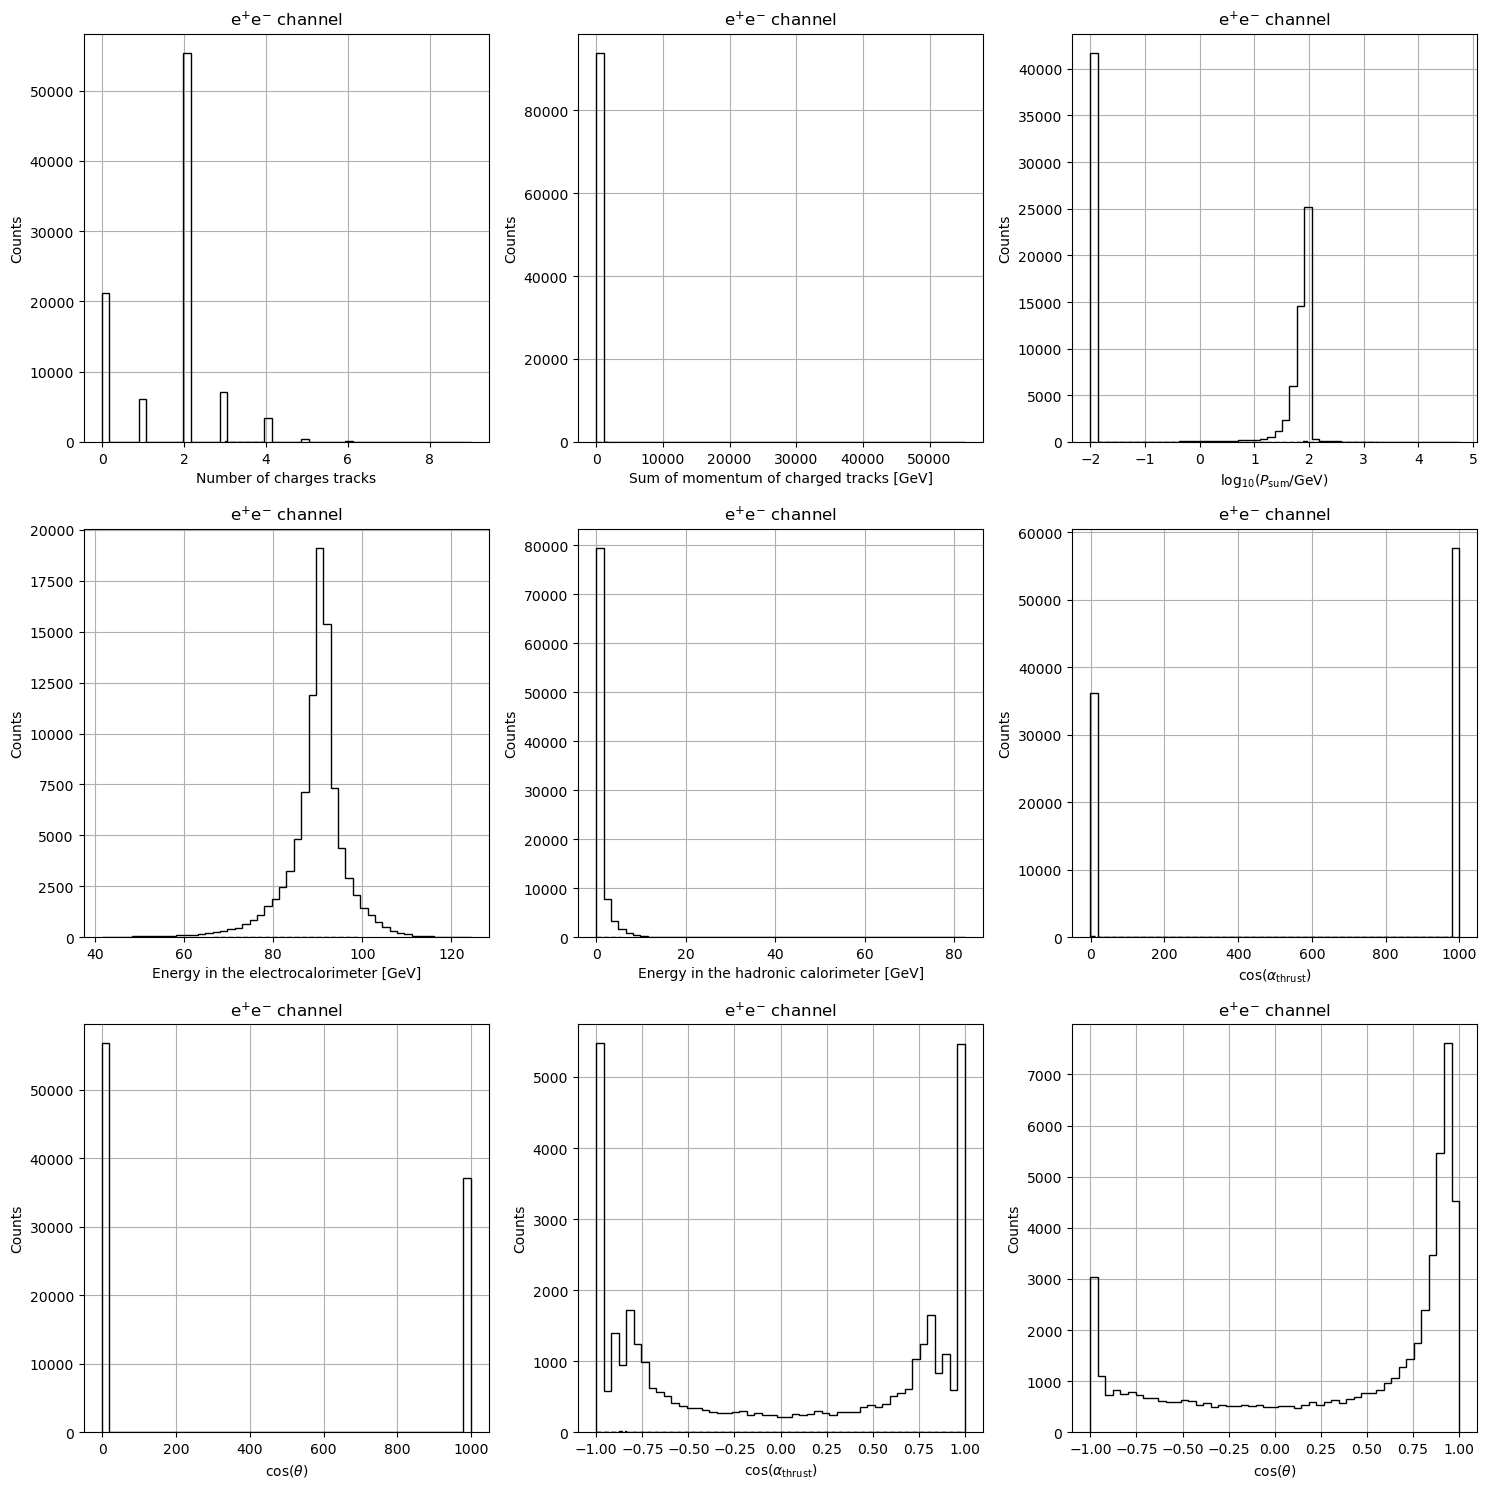

In [227]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15)) ## Create a grid of figures
## Each axis in ax is accessed via matrix notation, e.g., ax[i,j]

ax[0,0].hist(Ncharged, bins=50, color='black', label='No cuts',histtype='step')
ax[0,0].hist(Ncharged[mask],bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
ax[0,0].set_xlabel("Number of charges tracks")
ax[0,0].set_ylabel("Counts")
ax[0,0].set_title(r"$\rm{e^{+}e^{-}}$ channel")

ax[0,1].hist(Pcharged, bins=50, color='black', label='No cuts',histtype='step')
ax[0,1].hist(Pcharged[mask], bins=50, color='black', linestyle='--', label='Cuts', histtype='step')
ax[0,1].set_xlabel("Sum of momentum of charged tracks [GeV]")
ax[0,1].set_ylabel("Counts")
ax[0,1].set_title(r"$\rm{e^{+}e^{-}}$ channel")

ax[0,2].hist(np.log10(Pcharged + 0.01), bins=50, color='black', label='No cuts',histtype='step')
ax[0,2].hist(np.log10(Pcharged[mask] + 0.01), bins=50,color='black',linestyle='--',label='Cuts',histtype='step')
ax[0,2].set_xlabel(r"$\log_{10} (P_{\rm{sum}} / \rm{GeV})$")
ax[0,2].set_ylabel("Counts")
ax[0,2].set_title(r"$\rm{e^{+}e^{-}}$ channel")

ax[1,0].hist(E_ecal, bins=50, color='black', label='No cuts',histtype='step')
ax[1,0].hist(E_ecal[mask], bins=50, color='black', linestyle='--', label='Cuts', histtype='step')
ax[1,0].set_xlabel("Energy in the electrocalorimeter [GeV]")
ax[1,0].set_ylabel("Counts")
ax[1,0].set_title(r"$\rm{e^{+}e^{-}}$ channel")

ax[1,1].hist(E_hcal, bins=50, color='black', label='No cuts',histtype='step')
ax[1,1].hist(E_hcal[mask], bins=50, color='black', linestyle='--', label='Cuts', histtype='step')
ax[1,1].set_xlabel("Energy in the hadronic calorimeter [GeV]")
ax[1,1].set_ylabel("Counts")
ax[1,1].set_title(r"$\rm{e^{+}e^{-}}$ channel")

ax[1,2].hist(cos_thru, bins=50, color='black', label='No cuts',histtype='step')
ax[1,2].hist(cos_thru[mask], bins=50, color='black', linestyle='--', label='Cuts', histtype='step')
ax[1,2].set_xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
ax[1,2].set_ylabel("Counts")
ax[1,2].set_title(r"$\rm{e^{+}e^{-}}$ channel")

ax[2,0].hist(cos_thet, bins=50, color='black', label='No cuts',histtype='step')
ax[2,0].hist(cos_thet[mask], bins=50, color='black', linestyle='--', label='Cuts', histtype='step')
ax[2,0].set_xlabel(r"$\cos(\theta)$")
ax[2,0].set_ylabel("Counts")
ax[2,0].set_title(r"$\rm{e^{+}e^{-}}$ channel")

ax[2,1].hist(cos_thru, bins=np.linspace(-1,1,50), color='black', label='No cuts',histtype='step')
ax[2,1].hist(cos_thru[mask], bins=np.linspace(-1,1,50), color='black', linestyle='--', label='Cuts', histtype='step')
ax[2,1].set_xlabel(r"$\cos(\alpha_{\rm{thrust}})$")
ax[2,1].set_ylabel("Counts")
ax[2,1].set_title(r"$\rm{e^{+}e^{-}}$ channel")

ax[2,2].hist(cos_thet, bins=np.linspace(-1,1,50), color='black', label='No cuts',histtype='step')
ax[2,1].hist(cos_thet[mask], bins=np.linspace(-1,1,50), color='black', linestyle='--', label='Cuts', histtype='step')
ax[2,2].set_xlabel(r"$\cos(\theta)$")
ax[2,2].set_ylabel("Counts")
ax[2,2].set_title(r"$\rm{e^{+}e^{-}}$ channel")

fig.tight_layout() ## So labels are not clipped
# fig.savefig("../Figures/example.pdf") or plt.savefig(<str /path/to/filename>) to save the figures

### Exercises

2.3.1. Define four sets of cuts, one for each channel.
- did that, derived cut criteria for each from physical considerations and manual image classification of GROPE Data

2.3.2  Show the effects on the variables distributions, for every channel, with each cut.
- thats the acceptance of each cut, have print statements print out the acceptance of each cut.
- ---> STILL need to add those print statements for the cut acceptances

2.3.3. Build a 4x4 matrix containing the fraction of events of MC simulations of channel $i$ surviving the cuts to select events of channel $j$.
- acceptance matrix, computed above, normalised and total counts, but need to correc for the angle selection in the electron positron channel, as described below

2.3.4. Correct all the entries in the matrix for MC simulations of channel e+e- in order to keep only s-channel events using the numbers fracSChannel and totalSChannel calculated in the previous step.
- did the correction, lets see if its correct (pun not intended)

### Questions

1. There are two numbers to calculate the fraction of surviving events. Either dividing by the number of events without cuts or diving by 100000 which is the initial number of MC simulations. Why are those numbers different? Which one should be used? 
- Answer: Have to use all events without cuts, not 100k. MC simulations apparently sometimes generate unphysical values, the values that we HAVE is also what we filter from
3. In an ideal world how do we expect this 4x4 matrix to look like? 
- Answer: np.diag([1,1,1,1]), because the cuts would only affect the respective particles (no off-diagonal elements) and there would be perfect efficieny (diagonals = 1) because background would be 0 etc., i.e.: the peaks would be well separated and we could resolve everything perfectly, and take infinitly many measurements to effectively shrink systematic errors to 0
4. How can measure which of two possible 4x4 matrices is better? 
- Answer: If the numbers on the off-diagonals are smaller and the ones on the main diagonal bigger, it's a better matrix.

In [228]:
## Each entry here should be replaced with your results
acceptanceMatrix = np.array([[-1,-1,-1,-1],[-1,-1,-1,-1],[-1,-1,-1,-1],[-1,-1,-1,-1]]) # between 0-1
correctedAcceptanceMatrix = np.array([[-1,-1,-1,-1],[-1,-1,-1,-1],[-1,-1,-1,-1],[-1,-1,-1,-1]]) # corrected after s-t separation
totalNumberOfEvents = np.array([[-1,-1,-1,-1],[-1,-1,-1,-1],[-1,-1,-1,-1],[-1,-1,-1,-1]]) # real number of events used in the calculation

# Part 3 - Getting the physical results

Now that we spent time learning from MC simulations how each channel works and quantitatively estimated the response of our analysis. We can apply it to real data, in which we cannot know what is the real channel that created that event.

With that we can estimate what was the initial total number of events in each channel and, thus, calculate the cross section and decay width.

## Part 3.1 - Calculate the number of real data events after cuts

From data, we have the total number of detected events for each energy bin, $k$, $N^{k}_{\rm{det}}$. We then apply each of our 4 cuts for each channel $j$, getting the number of detected events in each energy bin, $k$ and for each cut, $j$: $N^{j,k}_{\rm{det}}$

In [229]:
# Table with energy bins, don't change this

energy_bins = [44,44.5,45,45.4,45.8,46.2,46.7,47.2]

In [230]:
# Example for reading data and applying cuts

# Choose a dataset from 1, 2, 4, 5 or 6 (3 was faulty and therefore deleted)

dataset = 1

file = uproot.open(f"../Data/Real/daten_{dataset}.root")
tree = file['h33']

Ncharged = np.array(tree['Ncharged'].array())
Pcharged = np.array(tree['Pcharged'].array())
E_ecal = np.array(tree['E_ecal'].array())
E_hcal = np.array(tree['E_hcal'].array())
cos_thru = np.array(tree['cos_thru'].array())
E_lep = np.array(tree['E_lep'].array())
cos_thet = np.array(tree['cos_thet'].array())

mask_safe = mask_safe = (cos_thet > -0.9) & (cos_thet < 0.5) # If looking for ee, this cut must be kept due to the s-t contamination! For other channels this can (and maybe should) be taken out
mask = (mask_safe) & (Ncharged > 2) & (Ncharged < 10) & (cos_thru > -0.7) & (E_ecal < 100) # completely random cuts, just to show the syntax needed!

for i in range(7): # loop over energy bins
    mask_total = mask & (E_lep > energy_bins[i]) & (E_lep < energy_bins[i+1])
    print(f"Number of real data events surviving random cuts in energy bins {i}: {mask_total.sum()}")

FileNotFoundError: [Errno 2] No such file or directory: '//../Data/Real/daten_1.root'

### Exercises

3.1.1. Get the vector $N_{\rm{det}}$ with the number of real data events surviving each set of cuts

In [19]:
N_det = np.array([[-1,-1,-1,-1],
                 [-1,-1,-1,-1],
                 [-1,-1,-1,-1],
                 [-1,-1,-1,-1],
                 [-1,-1,-1,-1],
                 [-1,-1,-1,-1],
                 [-1,-1,-1,-1]])

## Part 3.2 - Estimate the initial number of events in each channel

$N_{\rm{det}}$ doesn't represent the real number of initial events in each channel, because some events are cut out with the cuts and there is some cross contamination. This however is estimate by our acceptance matrix, $A$. We can, therefore, obtain $N_{init}$ by:

$N^{k}_{\rm{det}} = A N^{k}_{\rm{init}} \implies N^{k}_{\rm{init}} = A^{-1} N^{k}_{\rm{det}}$


### Exercises

3.2.1. Get the vector $N_{\rm{init}}$ by applying the inverted corrected acceptance matrix on the vector calculated in the previous step

In [20]:
N_init = np.array([[-1,-1,-1,-1],
                 [-1,-1,-1,-1],
                 [-1,-1,-1,-1],
                 [-1,-1,-1,-1],
                 [-1,-1,-1,-1],
                 [-1,-1,-1,-1],
                 [-1,-1,-1,-1]])

## Part 3.3 - Estimate the cross sections without errors

Now that we estimated the real initial number of events in each channel, we can estimate the energy-dependent cross section for each channel.

The cross-section is given by:

$\sigma_{i}(E_{k}) = \frac{N_{i,j}}{L_{k}} + \eta_{i,k}$,

where $\eta_{i,k}$ are the radiation corrections (here given to you as `radcorr_lep` and `racorr_had`)

In [21]:
# Radiation correction

radcorr_lep = np.array([0.09,0.2,0.36,0.52,0.22,-0.01,-0.08])
radcorr_had = np.array([2.0,4.3,7.7,10.8,4.7,-0.2,-1.6])

# Luminosity and energy bins for each of the given datasets

LEP_energies = {}
LEP_luminosities = {}
LEP_luminosities_error = {}

LEP_energies[1] = np.array([88.48021,89.47158,90.22720,91.23223,91.97109,92.97091,93.71841])
LEP_luminosities[1] = np.array([675.8590,543.6270,419.7760,3122.204,639.8380,479.2400,766.8380])
LEP_luminosities_error[1] = np.array([3.502185,3.179205,2.810879,7.786547,3.567344,3.121618,3.972102])

LEP_energies[2] = np.array([88.47777,89.46906,90.22324,91.23965,91.96968,92.97059,93.71714])
LEP_luminosities[2] = np.array([371.9800,488.5300,378.5461,2072.793,540.6800,369.4000,353.5000])
LEP_luminosities_error[2] = np.array([2.594937,3.009684,2.670417,6.334670,3.274401,2.737608,2.695570])

LEP_energies[4] = np.array([88.47939,89.46793,90.22266,91.22430,91.96648,92.96465,93.71712])
LEP_luminosities[4] = np.array([463.9790,667.5236,486.7641,2246.568,535.9080,450.6000,709.6980])
LEP_luminosities_error[4] = np.array([2.902361,3.521166,3.033955,6.603405,3.265110,3.027953,3.819882])

LEP_energies[5] = np.array([88.47939,89.46957,90.23120,91.23193,91.97322,92.96836,93.71712])
LEP_luminosities[5] = np.array([463.9790,472.6636,510.2150,3898.628,518.6880,624.5900,709.6980])
LEP_luminosities_error[5] = np.array([2.902361,2.964559,3.099458,8.694719,3.213012,3.564113,3.819882])

LEP_energies[6] = np.array([88.48021,89.46928,90.22604,91.24186,91.96859,92.96836,93.71685])
LEP_luminosities[6] = np.array([675.8590,800.8436,873.7021,7893.498,825.2780,624.5900,942.2280])
LEP_luminosities_error[6] = np.array([3.502185,3.855322,4.057872,12.37099,4.051215,3.564113,4.403135])

In [22]:
# Read the proper values for the dataset you have chosen in 3.1

energies = LEP_energies[dataset]
luminosities = LEP_luminosities[dataset]
luminosities_error = LEP_luminosities_error[dataset]

### Exercises

3.3.1. Calculate the cross section for each energy and channel for the chosen data set.

3.3.2. Plot the cross section as a function of energy for the four channels.

## Part 3.4 - Fit a Breit-Wigner function to the cross sections

Once the cross sections have been calculated, the physical quantities of the Z0-boson can be retrieved by fitting the expected Breit-Wigner cross section to the data:

$\frac{a}{\frac{4 (x-b)^2}{c^2} + \left(\frac{x}{b}\right)^2}$

### Questions

1. What physical characteristic of the Z0 does each of the free parameters, $a$, $b$ and $c$ correspond to?

### Exercises

3.4.1. Fit a Breit-Wigner function to each of the channels.

3.4.2. Plot the measured data (as in 3.3.2) together with the fitted function. Present the error in the fit function as a shaded area.

(The cells of 2.2. may be useful examples here :D)

In [23]:
def BreitWigner(x,a,b,c):
    return(a/(4./(c**2) * ((x - [b])**2) + (x/[b])**2))

In [24]:
# fit example

popt, pcov = curve_fit(BreitWigner, energies, crosssection)

NameError: name 'crosssection' is not defined

## Part 3.5 - Calculate errors in the cross section data

In the previous part, the fit was done disregarding statistical uncertainties in the measured data. This means that different poins are considered equally into the fit, even tough they shouldn't. In this section we present the calculation of the errors in $\Delta \sigma_{i,k}$.

In order to calculate the final $\Delta \sigma_{i,k}$, we first need to evaluate the statistical uncertainties in each of the terms, i.e., $\Delta L_{k}$, $\Delta N^{j,k}_{\rm{det}}$ and $\Delta A_{i,j}^{-1}$.

*Luminosity*

The uncertainties in the luminosity, $\Delta L_{k}$ were given above.

*Number of measured events*

The uncertainties in the measured events is purely Poissonian, therefore: $\Delta N_{\rm{det}}^{j,k} = \sqrt{N_{\rm{det}}^{j,k}}$

*Acceptance matrix*

The uncertainties in the acceptance matrix are $\Delta A_{i,j} = \sqrt{A_{i,j} (1-A_{i,j})/10^5}$

*Inverted acceptance matrix*

The uncertainties in the INVERTED acceptance matrix are $\Delta A^{-1} = A^{-1} \Delta A A^{-1}$

Finally, via error propagation:

$\sigma_{i,k} = \frac{\Sigma_j A_{i,j}^{-1} N_{\rm{det}}^{j,k}}{L_{k}}$

$\implies \Delta \sigma_{i,k} = \sqrt{\Sigma_j \left(\Delta A^{-1}_{i,j} \frac{N_{\rm{det}}^{j,k}}{L_{k}}\right)^2 + \Sigma_j \left( \Delta N_{\rm{det}}^{j,k} \frac{A^{-1}_{i,j}}{L_{k}} \right)^2 + \Sigma_j \left( \Delta L_k \frac{A^{-1}_{i,j} N_{\rm{det}}^{j,k}}{L^2_k}\right)^2 }$

### Exercises

3.5.1. Calculate the statistical uncertainties on the cross sections for each energy and channel.

3.5.2. Plot the cross section showing the statistical uncertainties.

## Part 3.6 - Fit of the data considering errors

Finally, we can now fit the data considering the errors in the data, as it should be.

### Exercises

3.6.1. Refit the data, now including the statistical uncertainties that you calculated.

3.6.2. Plot the data with errors together with the fitted functions.

3.6.3. Calculate the $\chi^2/\rm{NDF}$ between data and model in each channel.

### Questions

1. What does the $\chi^2/\rm{NDF}$ mean?

2. What range of $\chi^2/\rm{NDF}$ denotes a good fit? What happens outside of this range?

3. How good was the fit you just got? Elaborate...

In [25]:
# Example to run the fit with errors

popt, pcov = curve_fit(BreitWigner, energies, crosssection, sigma=delta_crosssection, absolute_sigma=True)

NameError: name 'crosssection' is not defined